## Taller de sistemas inteligentes

Integrantes: Nicolas Alejandro Ruiz Alarcon, Juan Guillermo Gomez Galeano, Pedro Daniel Hile Bustos.

Se entregarán los archivos pertenecientes a diez pacientes amputados (P01, P02, …, P10). Este archivo está constituido por ocho canales (Channel 01, …, Channel 08) y una clase (Postura de agarre). Cada paciente consta de 4.500 registros. Es decir, es una matriz de 4.500 filas por nueve columnas. El trabajo consiste en

Analisis y verificación del dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
DataSet_1 = pd.read_csv(r'C:\Users\nicol\OneDrive\Escritorio\UNIVERSIDADES\CORHUILA\Proyecto_semillero\2023_deep_learning\ventaneo_segmentacion_extraccion_señales_emg\Pacientes\Base de Datos-20230418T212159Z-001\Base de Datos\Nina_P02.csv')
DataSet_1.drop('Unnamed: 0', axis=1, inplace=True)


In [40]:
DataSet_1.head()

channel1  channel2  channel3      channel4      channel5      channel6   
0 -0.000015 -0.000014  0.000020  5.519000e-07 -2.353000e-06 -1.324300e-06  \
1  0.000006  0.000003 -0.000048 -5.049100e-06  5.957300e-07  4.406700e-07   
2  0.000002  0.000007 -0.000055 -5.385100e-06  2.609900e-06  4.301100e-06   
3  0.000002  0.000011 -0.000054 -4.881900e-06  2.945700e-06  6.147300e-06   
4  0.000006  0.000013 -0.000046 -2.196700e-06  1.938600e-06  3.797200e-06   

   channel7  channel8  channel9  
0  0.000002  0.000003         1  
1  0.000008  0.000007         1  
2  0.000008  0.000005         1  
3  0.000005  0.000005         1  
4  0.000004  0.000009         1

In [27]:
DataSet_1.shape

(396000, 9)

In [18]:
for tests in DataSet_1:
    DataSet_1.columns = list(range(len(DataSet_1.columns)))

In [28]:
DataSet_1.head()

channel1      channel2      channel3      channel4      channel5   
0  2.390100e-07 -2.417900e-07 -2.157900e-06  3.945700e-07  3.184200e-06  \
1  8.007000e-07 -2.879300e-07  9.329200e-08 -2.288100e-06 -9.436000e-07   
2 -1.213600e-06  3.836100e-07  9.329200e-08 -1.952300e-06  5.668400e-07   
3 -2.220800e-06  3.837600e-07 -7.450800e-08 -2.119900e-06  2.748800e-06   
4 -2.220900e-06 -2.875000e-07 -7.459100e-07 -3.294700e-06  4.091400e-06   

   channel6  channel7      channel8  channel9  
0 -0.000001 -0.000006  1.502700e-07         1  
1  0.000002  0.000002  1.534900e-06         1  
2  0.000002  0.000003  1.535300e-06         1  
3  0.000002  0.000004  2.506900e-08         1  
4  0.000002  0.000003 -4.781400e-07         1

In [29]:
DataSet_1.describe()

channel1      channel2      channel3      channel4      channel5   
count  3.960000e+05  3.960000e+05  3.960000e+05  3.960000e+05  3.960000e+05  \
mean  -3.347959e-10  4.203435e-09 -2.259123e-08  5.854355e-09  7.483739e-10   
std    2.453902e-05  3.034722e-05  9.177615e-06  7.919728e-06  4.942567e-06   
min   -4.766400e-04 -5.608500e-04 -2.111000e-04 -1.988200e-04 -8.766200e-05   
25%   -2.687025e-06 -2.675900e-06 -2.157400e-06 -1.976500e-06 -1.912025e-06   
50%   -1.125550e-07 -5.399450e-08  1.102700e-09  5.092850e-09 -1.301150e-08   
75%    2.320625e-06  2.609200e-06  2.167300e-06  2.007400e-06  1.882700e-06   
max    5.296300e-04  6.541700e-04  1.639900e-04  1.646400e-04  6.858600e-05   

           channel6      channel7      channel8       channel9  
count  3.960000e+05  3.960000e+05  3.960000e+05  396000.000000  
mean  -1.460658e-09 -1.296469e-08  2.664808e-09       2.500000  
std    4.899198e-06  1.072919e-05  3.889186e-05       1.707827  
min   -8.206400e-05 -2.333100e-04 -8.770900e-04       0.000000  
25%   -2.018325e-06 -2.350000e-06 -2.909100e-06       1.000000  
50%   -2.465750e-08 -6.552050e-08 -1.287600e-07       2.500000  
75%    1.961300e-06  2.164825e-06  2.532325e-06       4.000000  
max    7.621700e-05  1.863200e-04  7.955000e-04       5.000000

In [30]:
DataSet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396000 entries, 0 to 395999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   channel1  396000 non-null  float64
 1   channel2  396000 non-null  float64
 2   channel3  396000 non-null  float64
 3   channel4  396000 non-null  float64
 4   channel5  396000 non-null  float64
 5   channel6  396000 non-null  float64
 6   channel7  396000 non-null  float64
 7   channel8  396000 non-null  float64
 8   channel9  396000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 27.2 MB


In [31]:
print(str('Any missing data or NaN in the dataset:'), DataSet_1.isnull().values.any())

Any missing data or NaN in the dataset: False


In [32]:
print("The minimum and maximum values are {}, {}".format(np.min(DataSet_1.iloc[-2,:].values), np.max(DataSet_1.iloc[-2,:].values)))

The minimum and maximum values are -1.3876e-05, 3.3264e-06


In [57]:
#para el recuento del valor objetivo
label_dataset = DataSet_1['channel9'].value_counts(dropna = False)
label_dataset

channel9
0    66000
1    65212
2    64966
5    64713
3    64678
4    63636
Name: count, dtype: int64

<Axes: xlabel='channel9'>

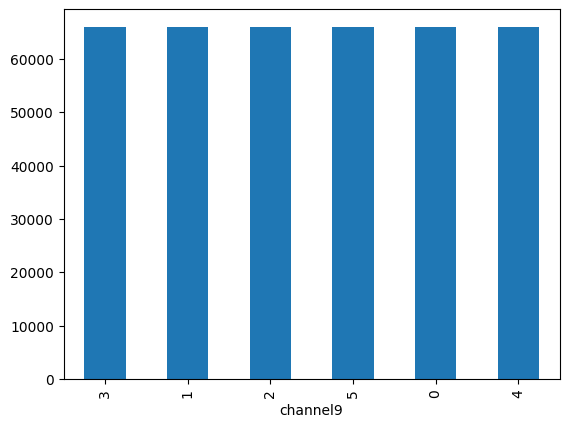

In [37]:
#visualización para la etiqueta objetivo 
label_dataset.plot.bar()

In [ ]:
#división del dataset en variable dependiente e independiente 
X_data = DataSet_1.iloc[:,:-1].values #valores independientes / caracteristicas
y_data = DataSet_1.iloc[:,-1].values #valores dependientes/objetivo

In [ ]:
#Obtencion de cartacteristicas
print(X_data)

[[-0.015625   0.0078125 -0.0078125 ...  0.0078125  0.015625   0.       ]
 [-0.0234375 -0.03125   -0.015625  ... -0.140625  -0.078125  -0.03125  ]
 [-0.0234375 -0.0546875 -0.0390625 ... -0.203125  -0.265625  -0.109375 ]
 ...
 [-0.015625  -0.015625  -0.0078125 ... -0.0078125 -0.0078125 -0.0234375]
 [-0.0078125  0.0078125 -0.015625  ...  0.         0.0078125  0.       ]
 [-0.0078125 -0.0078125 -0.015625  ... -0.015625  -0.0078125 -0.015625 ]]


In [ ]:
#Obtencion de mi target
print(y_data)

[0 0 0 ... 5 5 5]


In [ ]:
#comprobando el desequilibrio de las etiquetas 
from collections import Counter
counter_before = Counter(y_data)
print(counter_before)

Counter({0: 4500, 1: 4500, 2: 4500, 3: 4500, 4: 4500, 5: 4500})


In [ ]:
#Aplicando SMOTE para verificar no balanceos
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_data, y_data = oversample.fit_resample(X_data, y_data)

In [ ]:
counter_after = Counter(y_data)
print(counter_after)

Counter({0: 4500, 1: 4500, 2: 4500, 3: 4500, 4: 4500, 5: 4500})


In [ ]:
#dividir el dataset para el proceso de entrenamiento y prueba 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size =0.3, random_state=)

1. Realizar la extracción de caracteristicas en el dominio tiempo (Valor Absoluto Medio Mejorado (EMAV), Longitud de onda Mejorado (EWL), Valor Absoluto Medio (MAV), Longitud de onda (WL),  Cruce por cero (ZC), Cambio de Pendiente de la Señal (SSC), Raíz Cuadrada Media (RMS), Variación Media de la Amplitud (AAC), Diferencia Desviación Estándar Absoluta Valor (DASDV), Detector de Log (LD), Valor Absoluto Medio Modificado (MMAV), MMAV2, Tasa de porcentaje del impulso mioeléctrico (MYOP), Integral Cuadrada Simple (SSI), Varianza de EMG (VAR), Amplitud Wilson (WAMP) y Longitud máxima del fractal (MFL).

ELECCION MEJOR PACIENTE

In [ ]:
#librerias
import pandas as pd
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
p1=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P01.csv')
p2=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P02.csv')
p3=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P03.csv')
p4=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P04.csv')
p5=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P05.csv')
p6=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P06.csv')
p7=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P07.csv')
p8=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P08.csv')
p9=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P09.csv')
p10=pd.read_csv('/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/DATASETS_PACIENTES_AMPUTADOS/EMG_Myo/EMG_Myo/P10.csv')


In [ ]:
# creacion del dataset para almacenar los datos
index=["p1","p2","p3","p4","p5","p6","p7","p8","p9","p10"]
columns=["score_pred", "score_cv_hiper"]
score=pd.DataFrame(index=index,columns=columns)
score

score_pred score_cv_hiper
p1         NaN            NaN
p2         NaN            NaN
p3         NaN            NaN
p4         NaN            NaN
p5         NaN            NaN
p6         NaN            NaN
p7         NaN            NaN
p8         NaN            NaN
p9         NaN            NaN
p10        NaN            NaN

In [ ]:
X1=p1.iloc[:,:8]
Y1=p1.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X1, Y1,test_size=0.3,random_state=1, stratify=Y1)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Y1

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
X_train

array([[0.50196078, 0.49411765, 0.49803922, ..., 0.50588235, 0.49411765,
        0.50196078],
       [0.50588235, 0.49803922, 0.50588235, ..., 0.4627451 , 0.50588235,
        0.50196078],
       [0.49019608, 0.44313725, 0.4627451 , ..., 0.43529412, 0.40392157,
        0.43137255],
       ...,
       [0.49411765, 0.49803922, 0.49411765, ..., 0.50588235, 0.49411765,
        0.50588235],
       [0.51764706, 0.49803922, 0.49411765, ..., 0.51764706, 0.49803922,
        0.55686275],
       [0.54117647, 0.54117647, 0.49019608, ..., 0.46666667, 0.4745098 ,
        0.49019608]])

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X1, Y1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 11, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred1 = cross_val_score(knn_cv, X1, Y1, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred1 = np.mean(score_pred1)
#print each cv score (accuracy) and average them
print(score_pred1)
print('cv_scores mean:{}'.format(score_mean_pred1))

[0.47444444 0.46592593 0.51759259 0.50462963 0.49777778]
cv_scores mean:0.4920740740740741


In [ ]:
#check accuracy of our model on the test data
score1 = knn_cv.score(X_test, y_test)
score1

0.48728395061728397

In [ ]:
score.iloc[0,0]=score1
score.iloc[0,1]=score_mean_pred1

In [ ]:
X2=p2.iloc[:,:8]
Y2=p2.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X2, Y2,test_size=0.3,random_state=1, stratify=Y2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X2, Y2)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred2 = cross_val_score(knn_cv, X1, Y1, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred2 = np.mean(score_pred2)
#print each cv score (accuracy) and average them
print(score_pred2)
print('cv_scores mean:{}'.format(score_mean_pred2))

[0.46888889 0.46518519 0.51259259 0.50833333 0.49703704]
cv_scores mean:0.49040740740740746


In [ ]:
#check accuracy of our model on the test data
score2 = knn_cv.score(X_test, y_test)
score2

0.434320987654321

In [ ]:
score.iloc[1,0]=score2
score.iloc[1,1]=score_mean_pred2

In [ ]:
X3=p3.iloc[:,:8]
Y3=p3.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X3, Y3,test_size=0.3,random_state=1, stratify=Y3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X3, Y3)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred3 = cross_val_score(knn_cv, X3, Y3, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred3 = np.mean(score_pred3)
#print each cv score (accuracy) and average them
print(score_pred3)
print('cv_scores mean:{}'.format(score_mean_pred3))

[0.39833333 0.44907407 0.4262963  0.43185185 0.46111111]
cv_scores mean:0.4333333333333333


In [ ]:
#check accuracy of our model on the test data
score3 = knn_cv.score(X_test, y_test)
score3

0.4491358024691358

In [ ]:
score.iloc[2,0]=score3
score.iloc[2,1]=score_mean_pred3

In [ ]:
X4=p4.iloc[:,:8]
Y4=p4.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X4, Y4,test_size=0.3,random_state=1, stratify=Y4)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X4, Y4)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
#train model with cv of 5 
score_pred4 = cross_val_score(knn_cv, X4, Y4, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred4 = np.mean(score_pred4)
#print each cv score (accuracy) and average them
print(score_pred4)
print('cv_scores mean:{}'.format(score_mean_pred4))

[0.5487037  0.58481481 0.56111111 0.54222222 0.55018519]
cv_scores mean:0.5574074074074075


In [ ]:
#check accuracy of our model on the test data
score4 = knn_cv.score(X_test, y_test)
score4

0.5654320987654321

In [ ]:
score.iloc[3,0]=score4
score.iloc[3,1]=score_mean_pred4

In [ ]:
X5=p5.iloc[:,:8]
Y5=p5.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X5, Y5,test_size=0.3,random_state=1, stratify=Y5)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X5, Y5)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred5 = cross_val_score(knn_cv, X5, Y5, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred5 = np.mean(score_pred5)
#print each cv score (accuracy) and average them
print(score_pred5)
print('cv_scores mean:{}'.format(score_mean_pred5))

[0.49703704 0.48018519 0.47962963 0.47055556 0.49666667]
cv_scores mean:0.4848148148148148


In [ ]:
#check accuracy of our model on the test data
score5 = knn_cv.score(X_test, y_test)
score5

0.48703703703703705

In [ ]:
score.iloc[4,0]=score5
score.iloc[4,1]=score_mean_pred5

In [ ]:
X6=p6.iloc[:,:8]
Y6=p6.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X6, Y6,test_size=0.3,random_state=1, stratify=Y6)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X6, Y6)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred6 = cross_val_score(knn_cv, X6, Y6, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred6 = np.mean(score_pred6)
#print each cv score (accuracy) and average them
print(score_pred6)
print('cv_scores mean:{}'.format(score_mean_pred6))

[0.38018519 0.43555556 0.44944444 0.45277778 0.41351852]
cv_scores mean:0.4262962962962963


In [ ]:
#check accuracy of our model on the test data
score6 = knn_cv.score(X_test, y_test)
score6

0.44419753086419755

In [ ]:
score.iloc[5,0]=score6
score.iloc[5,1]=score_mean_pred6

In [ ]:
X7=p7.iloc[:,:8]
Y7=p7.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X5, Y5,test_size=0.3,random_state=1, stratify=Y7)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X7, Y7)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred7 = cross_val_score(knn_cv, X7, Y7, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred7 = np.mean(score_pred7)
#print each cv score (accuracy) and average them
print(score_pred7)
print('cv_scores mean:{}'.format(score_mean_pred7))

[0.55907407 0.58074074 0.60092593 0.62055556 0.605     ]
cv_scores mean:0.5932592592592593


In [ ]:
#check accuracy of our model on the test data
score7 = knn_cv.score(X_test, y_test)
score7

0.4876543209876543

In [ ]:
score.iloc[6,0]=score7
score.iloc[6,1]=score_mean_pred7

In [ ]:
X8=p8.iloc[:,:8]
Y8=p8.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X8, Y8,test_size=0.3,random_state=1, stratify=Y8)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X8, Y8)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred8 = cross_val_score(knn_cv, X8, Y8, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred8 = np.mean(score_pred8)
#print each cv score (accuracy) and average them
print(score_pred8)
print('cv_scores mean:{}'.format(score_mean_pred8))

[0.43259259 0.43055556 0.44944444 0.44851852 0.46074074]
cv_scores mean:0.4443703703703704


In [ ]:
#check accuracy of our model on the test data
score8 = knn_cv.score(X_test, y_test)
score8

0.45111111111111113

In [ ]:
score.iloc[7,0]=score8
score.iloc[7,1]=score_mean_pred8

In [ ]:
X9=p9.iloc[:,:8]
Y9=p9.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X9, Y9,test_size=0.3,random_state=1, stratify=Y9)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X9, Y9)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred9 = cross_val_score(knn_cv, X9, Y9, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred9 = np.mean(score_pred9)
#print each cv score (accuracy) and average them
print(score_pred9)
print('cv_scores mean:{}'.format(score_mean_pred9))

[0.40111111 0.44296296 0.43851852 0.44388889 0.44055556]
cv_scores mean:0.4334074074074074


In [ ]:
#check accuracy of our model on the test data
score9 = knn_cv.score(X_test, y_test)
score9

0.43333333333333335

In [ ]:
score.iloc[8,0]=score9
score.iloc[8,1]=score_mean_pred9

In [ ]:
X10=p10.iloc[:,:8]
Y10=p10.iloc[:,8].values
X_train, X_test, y_train, y_test= train_test_split(X10, Y10,test_size=0.3,random_state=1, stratify=Y10)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X10, Y10)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors = 15, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
#train model with cv of 5 
score_pred10 = cross_val_score(knn_cv, X10, Y10, cv=5)
knn_cv.fit(X_train,y_train)
score_mean_pred10 = np.mean(score_pred10)
#print each cv score (accuracy) and average them
print(score_pred10)
print('cv_scores mean:{}'.format(score_mean_pred10))

[0.46351852 0.50592593 0.55018519 0.51962963 0.49314815]
cv_scores mean:0.5064814814814814


In [ ]:
#check accuracy of our model on the test data
score10 = knn_cv.score(X_test, y_test)
score10

0.5069135802469136

In [ ]:
score.iloc[9,0]=score10
score.iloc[9,1]=score_mean_pred10

In [ ]:
score

score_pred score_cv_hiper
p1    0.487284       0.492074
p2    0.434321       0.490407
p3    0.449136       0.433333
p4    0.565432       0.557407
p5    0.487037       0.484815
p6    0.444198       0.426296
p7    0.487654       0.593259
p8    0.451111        0.44437
p9    0.433333       0.433407
p10   0.506914       0.506481

In [ ]:
score.dtypes

score_pred        object
score_cv_hiper    object
dtype: object

In [ ]:
score['score_pred'] = score['score_pred'].astype(float)

In [ ]:
score['score_cv_hiper'] = score['score_cv_hiper'].astype(float)

In [ ]:
score.dtypes

score_pred        float64
score_cv_hiper    float64
dtype: object

In [ ]:
score.nlargest(1,"score_pred")

score_pred  score_cv_hiper
p4    0.565432        0.557407

In [ ]:
score.nlargest(1,"score_cv_hiper")

score_pred  score_cv_hiper
p7    0.487654        0.593259

ESTRACCIÓN DE CARACTERISTICAS:

Parte 1: Revisión de la segmentación

In [ ]:
import pandas as pd
Data1 = pd.read_csv('/content/drive/MyDrive/SEGMENTACION_DWT/Nina_P01.csv')

Segmentación de rango 200 por cada canal (Chanel 1 - Chanel 8)

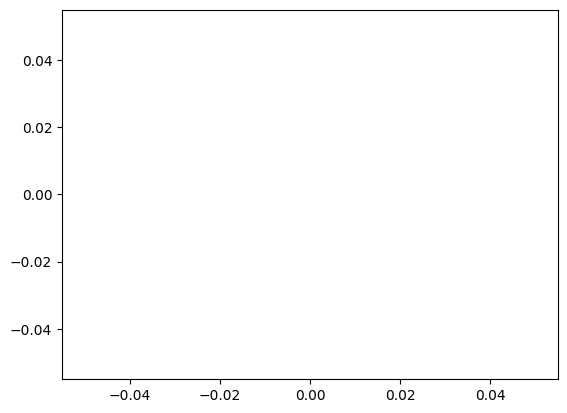

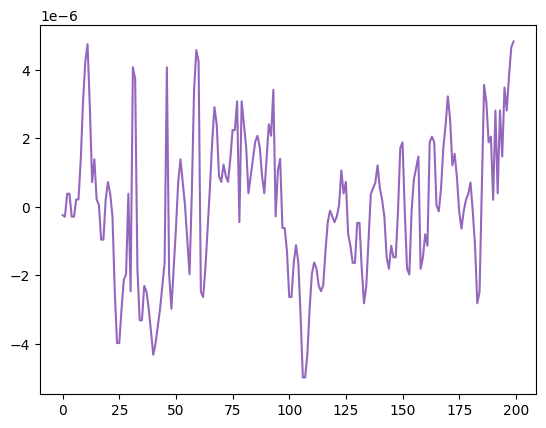

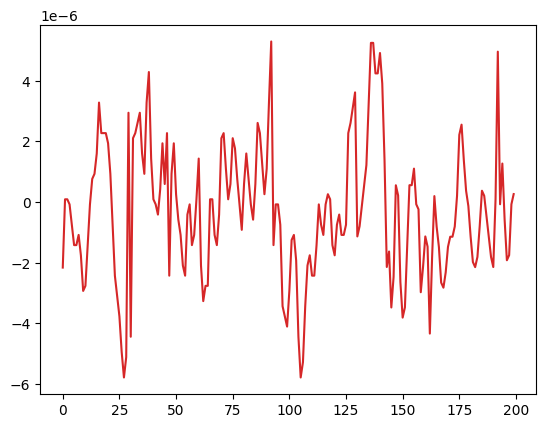

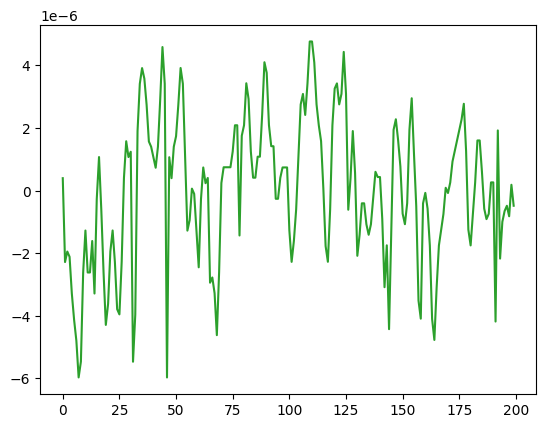

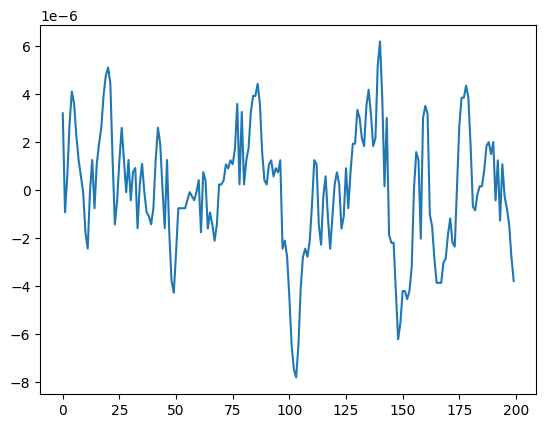

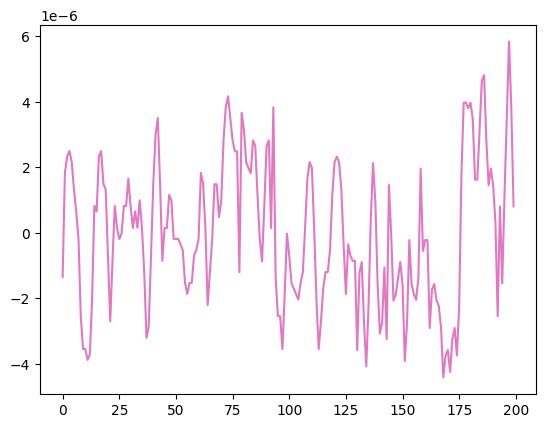

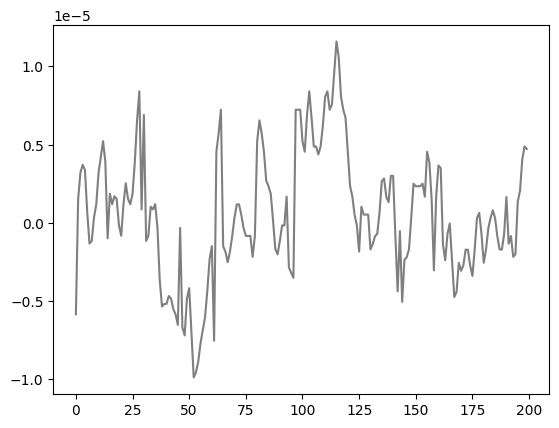

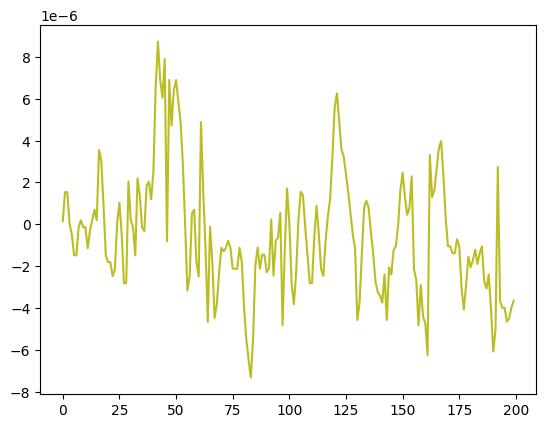

In [ ]:
import matplotlib.pyplot as plt
Data_1= pd.DataFrame(Data1.iloc[96000:396600,1])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Data_1, color = "tab:orange")
plt.show()
Data_2= pd.DataFrame(Data1.iloc[0:200,2])
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(Data_2, color = "tab:purple")
plt.show()
Data_3= pd.DataFrame(Data1.iloc[0:200,3])
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(Data_3, color = "tab:red")
plt.show()
Data_4= pd.DataFrame(Data1.iloc[0:200,4])
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(Data_4, color = "tab:green")
plt.show()
Data_5= pd.DataFrame(Data1.iloc[0:200,5])
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
ax5.plot(Data_5, color = "tab:blue")
plt.show()
Data_6= pd.DataFrame(Data1.iloc[0:200,6])
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
ax6.plot(Data_6, color = "tab:pink")
plt.show()
Data_7= pd.DataFrame(Data1.iloc[0:200,7])
fig7 = plt.figure()
ax7 = fig7.add_subplot(1,1,1)
ax7.plot(Data_7, color = "tab:gray")
plt.show()
Data_8= pd.DataFrame(Data1.iloc[0:200,8])
fig8 = plt.figure()
ax8 = fig8.add_subplot(1,1,1)
ax8.plot(Data_8, color = "tab:olive")
plt.show()

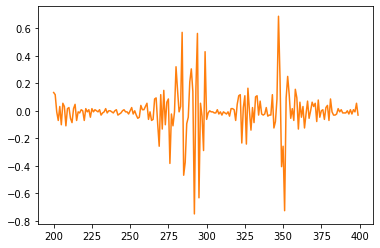

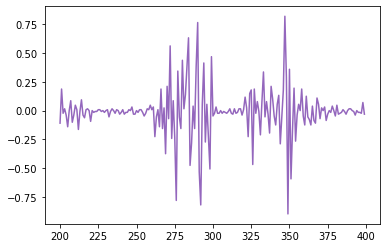

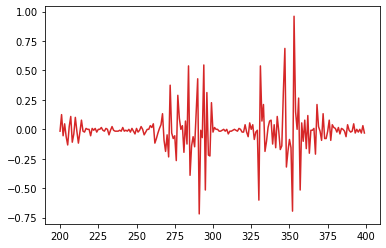

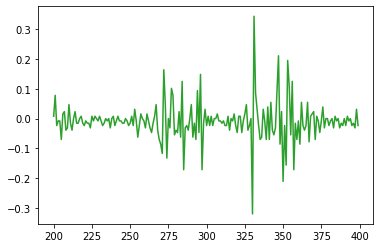

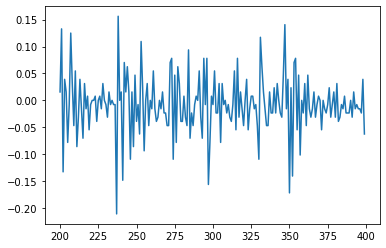

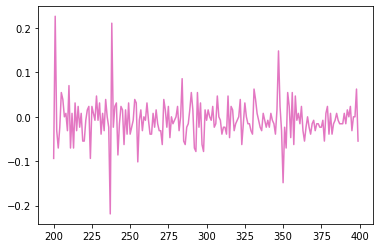

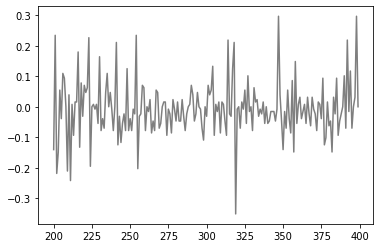

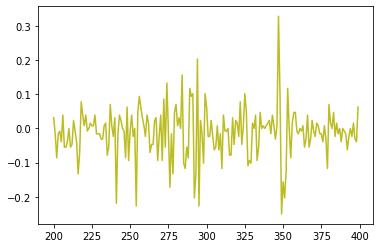

In [ ]:
import matplotlib.pyplot as plt
Data_1= pd.DataFrame(Data1.iloc[200:400,0])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Data_1, color = "tab:orange")
plt.show()
Data_2= pd.DataFrame(Data1.iloc[200:400,1])
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(Data_2, color = "tab:purple")
plt.show()
Data_3= pd.DataFrame(Data1.iloc[200:400,2])
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(Data_3, color = "tab:red")
plt.show()
Data_4= pd.DataFrame(Data1.iloc[200:400,3])
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(Data_4, color = "tab:green")
plt.show()
Data_5= pd.DataFrame(Data1.iloc[200:400,4])
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
ax5.plot(Data_5, color = "tab:blue")
plt.show()
Data_6= pd.DataFrame(Data1.iloc[200:400,5])
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
ax6.plot(Data_6, color = "tab:pink")
plt.show()
Data_7= pd.DataFrame(Data1.iloc[200:400,6])
fig7 = plt.figure()
ax7 = fig7.add_subplot(1,1,1)
ax7.plot(Data_7, color = "tab:gray")
plt.show()
Data_8= pd.DataFrame(Data1.iloc[200:400,7])
fig8 = plt.figure()
ax8 = fig8.add_subplot(1,1,1)
ax8.plot(Data_8, color = "tab:olive")
plt.show()

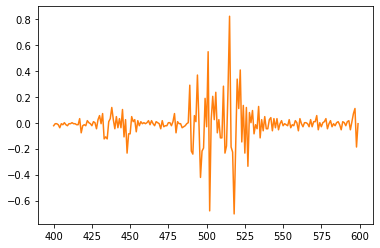

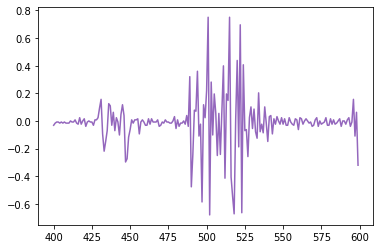

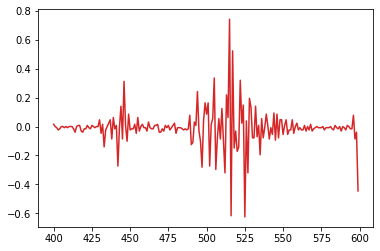

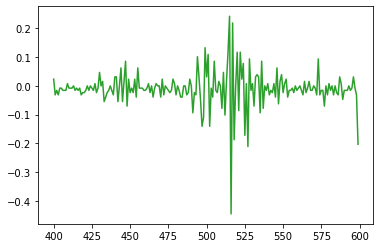

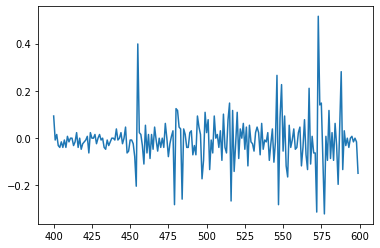

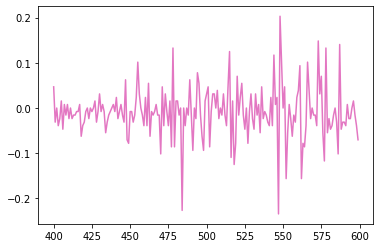

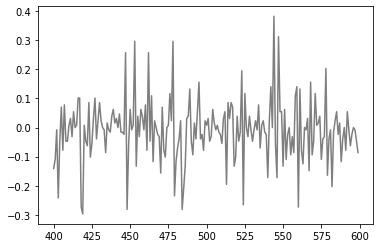

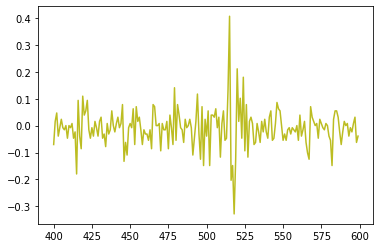

In [ ]:
import matplotlib.pyplot as plt
Data_1= pd.DataFrame(Data1.iloc[400:600,0])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Data_1, color = "tab:orange")
plt.show()
Data_2= pd.DataFrame(Data1.iloc[400:600,1])
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(Data_2, color = "tab:purple")
plt.show()
Data_3= pd.DataFrame(Data1.iloc[400:600,2])
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(Data_3, color = "tab:red")
plt.show()
Data_4= pd.DataFrame(Data1.iloc[400:600,3])
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(Data_4, color = "tab:green")
plt.show()
Data_5= pd.DataFrame(Data1.iloc[400:600,4])
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
ax5.plot(Data_5, color = "tab:blue")
plt.show()
Data_6= pd.DataFrame(Data1.iloc[400:600,5])
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
ax6.plot(Data_6, color = "tab:pink")
plt.show()
Data_7= pd.DataFrame(Data1.iloc[400:600,6])
fig7 = plt.figure()
ax7 = fig7.add_subplot(1,1,1)
ax7.plot(Data_7, color = "tab:gray")
plt.show()
Data_8= pd.DataFrame(Data1.iloc[400:600,7])
fig8 = plt.figure()
ax8 = fig8.add_subplot(1,1,1)
ax8.plot(Data_8, color = "tab:olive")
plt.show()

Graficas de segmentacion en 1500

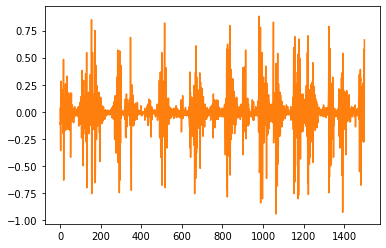

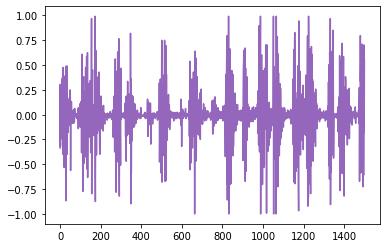

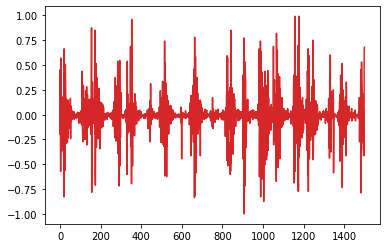

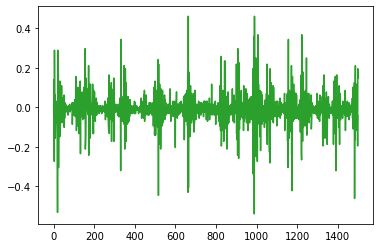

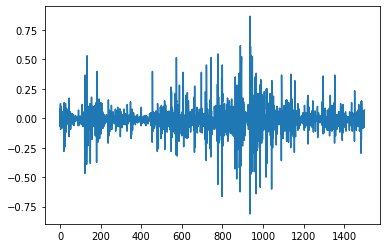

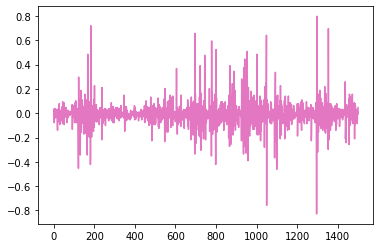

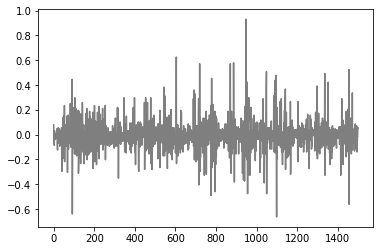

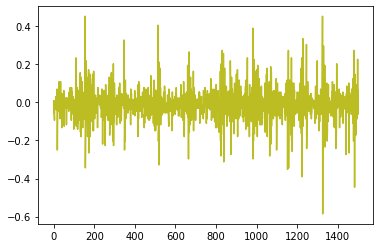

In [ ]:
import matplotlib.pyplot as plt
Data_1= pd.DataFrame(Data1.iloc[0:1500,0])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(Data_1, color = "tab:orange")
plt.show()
Data_2= pd.DataFrame(Data1.iloc[0:1500,1])
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(Data_2, color = "tab:purple")
plt.show()
Data_3= pd.DataFrame(Data1.iloc[0:1500,2])
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(Data_3, color = "tab:red")
plt.show()
Data_4= pd.DataFrame(Data1.iloc[0:1500,3])
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)
ax4.plot(Data_4, color = "tab:green")
plt.show()
Data_5= pd.DataFrame(Data1.iloc[0:1500,4])
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
ax5.plot(Data_5, color = "tab:blue")
plt.show()
Data_6= pd.DataFrame(Data1.iloc[0:1500,5])
fig6 = plt.figure()
ax6 = fig6.add_subplot(1,1,1)
ax6.plot(Data_6, color = "tab:pink")
plt.show()
Data_7= pd.DataFrame(Data1.iloc[0:1500,6])
fig7 = plt.figure()
ax7 = fig7.add_subplot(1,1,1)
ax7.plot(Data_7, color = "tab:gray")
plt.show()
Data_8= pd.DataFrame(Data1.iloc[0:1500,7])
fig8 = plt.figure()
ax8 = fig8.add_subplot(1,1,1)
ax8.plot(Data_8, color = "tab:olive")
plt.show()

In [ ]:
#Se crean los arreglos para cada canal
Ch1 = [];Ch2 = [];Ch3 = [];Ch4 = [];Ch5 = [];Ch6 = [];Ch7 = [];Ch8 = [];cl=[]
#Limites de segementación
lim1 = 22500
lim2 = 22590
#Contador para ciclo while
i = 0
#Luego se crea un ciclo while para segmentar 250 veces en cada canal mientras que llegue a las repeticiones necesarias
# para que capture los 4500 datos de cada canal
while i < 99:
  Channel1 = DataSet_1.iloc[lim1:lim2,0]
  Channel2 = DataSet_1.iloc[lim1:lim2,1]
  Channel3 = DataSet_1.iloc[lim1:lim2,2]
  Channel4 = DataSet_1.iloc[lim1:lim2,3]
  Channel5 = DataSet_1.iloc[lim1:lim2,4]
  Channel6 = DataSet_1.iloc[lim1:lim2,5]
  Channel7 = DataSet_1.iloc[lim1:lim2,6]
  Channel8 = DataSet_1.iloc[lim1:lim2,7]
  clase = DataSet_1.iloc[lim2:lim1,8]
  
#Metodo append para almacenar los nuevos datos sobre la segmentación
  Ch1.append(Channel1)
  Ch2.append(Channel2)
  Ch3.append(Channel3)
  Ch4.append(Channel4)
  Ch5.append(Channel5)
  Ch6.append(Channel6)
  Ch7.append(Channel7)
  Ch8.append(Channel8)
  cl.append(clase)

  i = i + 1

#Asolapamiento
  lim1 = lim1 + 45
  lim2 = lim2 + 45
  
print(Ch8)  

[22500   -0.007812
22501   -0.007812
22502   -0.007812
22503   -0.007812
22504   -0.015625
           ...   
22585   -0.015625
22586   -0.007812
22587    0.007812
22588    0.000000
22589   -0.031250
Name: Chanel_8, Length: 90, dtype: float64, 22545    0.000000
22546    0.000000
22547   -0.015625
22548    0.000000
22549    0.007812
           ...   
22630   -0.007812
22631   -0.007812
22632   -0.007812
22633   -0.007812
22634   -0.007812
Name: Chanel_8, Length: 90, dtype: float64, 22590   -0.015625
22591   -0.007812
22592   -0.023438
22593   -0.015625
22594   -0.007812
           ...   
22675   -0.007812
22676   -0.007812
22677   -0.015625
22678   -0.023438
22679    0.000000
Name: Chanel_8, Length: 90, dtype: float64, 22635   -0.015625
22636   -0.007812
22637   -0.015625
22638   -0.007812
22639    0.000000
           ...   
22720    0.000000
22721   -0.007812
22722   -0.007812
22723   -0.015625
22724    0.000000
Name: Chanel_8, Length: 90, dtype: float64, 22680   -0.007812
22681   -0.00

In [ ]:
#Se crea una arreglo de caracteristicas con un tamaño acorde al número de repeteciones establecidas en la iteración del ciclo while
Caracteristicas_Channel1 = Ch1[0:99]
Caracteristicas_Channel2 = Ch2[0:99]
Caracteristicas_Channel3 = Ch3[0:99]
Caracteristicas_Channel4 = Ch4[0:99]
Caracteristicas_Channel5 = Ch5[0:99]
Caracteristicas_Channel6 = Ch6[0:99]
Caracteristicas_Channel7 = Ch7[0:99]
Caracteristicas_Channel8 = Ch8[0:99]

Total_cat = [Caracteristicas_Channel1, Caracteristicas_Channel2, Caracteristicas_Channel3, Caracteristicas_Channel4, Caracteristicas_Channel5, Caracteristicas_Channel6, Caracteristicas_Channel7, Caracteristicas_Channel8]

In [ ]:
Caracteristicas_Channel1

[22500    0.000000
 22501   -0.007812
 22502    0.000000
 22503    0.000000
 22504   -0.015625
            ...   
 22585   -0.015625
 22586   -0.015625
 22587    0.000000
 22588   -0.015625
 22589   -0.007812
 Name: Chanel_1, Length: 90, dtype: float64, 22545    0.000000
 22546   -0.007812
 22547   -0.007812
 22548    0.000000
 22549    0.000000
            ...   
 22630   -0.015625
 22631    0.007812
 22632    0.000000
 22633   -0.015625
 22634   -0.007812
 Name: Chanel_1, Length: 90, dtype: float64, 22590    0.000000
 22591    0.000000
 22592   -0.023438
 22593   -0.015625
 22594   -0.015625
            ...   
 22675   -0.007812
 22676    0.000000
 22677   -0.015625
 22678    0.000000
 22679   -0.015625
 Name: Chanel_1, Length: 90, dtype: float64, 22635   -0.015625
 22636   -0.007812
 22637   -0.007812
 22638   -0.007812
 22639   -0.007812
            ...   
 22720    0.000000
 22721   -0.015625
 22722    0.000000
 22723   -0.023438
 22724    0.000000
 Name: Chanel_1, Length: 90, dty

In [ ]:
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
from pandas.core.internals.managers import itertools

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def LD(b):
  L = b.size 
  y = 0
  LD = 0
  for i in range (0,L):
    y = y + (np.exp((np.log10(np.absolute(b*(i))))))
  LD= y
  return (np.mean(LD)) / L

def DASDV(b):
  N = b.size
  y = 0
  DASDV = 0
  for i in range (0, N-1):
    can6 = 0
    can7 = 0
    can6 = can7 + (b*(i+1))
    can7 = can6 + (b*(i))
    y = y + ((can6 - can7)**2)
  DASDV = y
  return (np.sqrt((np.mean(DASDV)))/(N-1)) 

def SSC(b):
  ssc = len(list(itertools.groupby(b, lambda b: b > 0)))
  ssc=ssc-1
  return ssc
def AAC(b):
  N = b.size
  Y = 0
  AAC = 0
  for i in range(0, N-1):
    can4 = 0
    can5 = 0
    can4 = can4 + (b*(i+1))
    can5 = can5 + (b*(i))
    Y = Y + (np.abs(can4 - can5))
  AAC = Y
  return (np.mean(AAC)) / N


def EMAV(b):
  L = b.size
  Y = 0
  EMAV = 0
  for i in range(0,L):
    if i >= 0.2 * L  and  i <= 0.8 * L:
      p = 0.75;
    else:
      p = 0.5;
    Y = Y + np.abs(b*(i** p));
  EMAV = Y
  return (np.mean(EMAV)) / L

def WL(b):
  N  = b.size
  y = 0
  WL = 0
  for k in range (1,N):
    y = y + np.abs(b*(k) - b*(k-1))
  WL = y
  return np.mean(WL)

def EWL(b):
  L = b.size 
  EWL = 0
  for i in range (1,L):
    if i >= 0.2 * L  and  i <= 0.8 * L:
      p = 0.75
    else:
      p = 0.5
    EWL = EWL + np.abs((b*(i) - b*(i-1))**p)
  EWL[np.isnan(EWL)]= 0 
  return np.mean(EWL) 

def MYOP (b):
  L=b.size
  MYOP = 0
  for i in range (0,L):
    x_2 = b.values
    z_1 = librosa.zero_crossings(x_2*i)
    z_1 = np.multiply(z_1, 1)
  MYOP = z_1
  return (1/L)* np.sum(MYOP)

def zcruce(b):
  L=b.size
  zcruce = 0
  y = 0
  for i in range (0,L-1):
    x_2 = b.values
    z_1 = librosa.zero_crossings(x_2*i)
    z_1 = np.multiply(z_1, 1)
  zcruce = z_1
  return np.sum(zcruce)


def MMAV(x): 
  N =b.size 
  Y = 0
  for i in range(0,N):
    if i >= 0.25 * N  and  i <= 0.75 * N:
      w = 1
    else:
      w = 0.5
    Y = Y + (w * np.abs(b*(i)))
  MMAV = (1 / N) * Y
  return np.mean(MMAV)

def MMAV2(b):
  N = b.size
  y = 0
  MMAV = 0
  for i in range (0, N):
    if 0.25*N <= i  and  i <= 0.75 * N:
      w = 1
    elif i < 0.25 * N:
      w = (4*(i))/N
    else:
      w = (4*(i-N))/N
    y = y + (w * np.abs(b*(i)))
  MMAV2 = (1 / N) * y
  return np.mean(MMAV2)

def WAMP(b):
  th = 0.016
  N = b.size
  WAMP = 0
  for i in range (0, N-1):
    x = abs(np.diff(b*(i)))
    umbral = x >= th
  WAMP = umbral 
  return np.sum(WAMP)

def MFL(b):
  N = b.size
  y = 0
  MFL = 0
  for i in range (0, N-1):
    y = y + (b*(i-1) -  b*(i))**2
  MFL = y
  return np.log10(np.sqrt(np.mean(MFL)))
  


# Import library
import librosa
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pywt
import requests, zipfile 
import io
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.fft import fft, fftfreq
import csv
FEATURES = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','MFL','WAMP','CLASE']

Clase = 5 # Se coloca la clase
frame = 90 # Se coloca el mismo tamaño de segmentacion
Feature_Final = []
for a in Total_cat:  # creamos este primer ciclo for para recorrer la lista "Total_Cat"
  for b in a:  #Recorrido interno de Total_cat accediento a cada segmento de 250 datos
    emav = (EMAV(b))
    ewl = (EWL(b))
    mav = ((1/frame)*(np.sum(np.abs(b))))  # Mean Absolute Value
    wl = (WL(b))  # Wavelength
    zc = (zcruce(b))  # Zero-Crossing
    ssc =(SSC(b))
    rms = (np.sqrt((1/frame)*(np.sum(b ** 2))))
    aac = (AAC(b)) # Average Amplitude Change
    dasdv = (DASDV(b)) # Difference absolute standard deviation value
    log_detector = (LD(b))
    mmav = (MMAV(b))
    mmav2 = (MMAV2(b)) 
    myop = (MYOP(b))
    iemg = (np.sum((b**2)))  # Integral
    variance = (((1/(frame-1))*np.sum((b**2))))
    wamp = (WAMP(b))
    mfl = (MFL(b))
    DATOS_CONJ = [emav,ewl,mav,wl,zc,ssc,
                  rms, aac, dasdv,log_detector,myop,iemg,mmav,mmav2,
                  variance,mfl,wamp,Clase]
    Feature_Final.append(DATOS_CONJ)
#Nota: Cuando realice la estraccion de caracteristicas se debe realizar por cada clase.
#Recuerde que usted toma 4500 datos porque son los datos de la clase 0
#Debe realizar los mimsos pasos desde el paso de la asignacion de canales
#IMPORTANTE: Cambie el numero de la clase y en la segmentacion cambie la posicion de
#inicio y finalizacion de la segmentacion desde el inicio de la proxima clase
#Ej: 0-4499 clase 0, 4500 - 8999 Clase 1...

In [ ]:
dataset_cat_cls0 = pd.DataFrame(columns = [FEATURES], data = Feature_Final)
dataset_cat_cls0.to_csv("dataset_cat_cls0.csv", index = False, header = True, sep = ",")

In [ ]:
dataset_cat_cls1 = pd.DataFrame(columns = [FEATURES], data = Feature_Final)
dataset_cat_cls1.to_csv("dataset_cat_cls1.csv",index = False, header = True, sep = ",")

In [ ]:
dataset_cat_cls2 = pd.DataFrame(columns = [FEATURES], data = Feature_Final)
dataset_cat_cls2.to_csv("dataset_cat_cls2.csv",index = False ,header = True, sep = ",")

In [ ]:
dataset_cat_cls3 = pd.DataFrame(columns = [FEATURES], data = Feature_Final)
dataset_cat_cls3.to_csv("dataset_cat_cls3.csv", index = False,header = True, sep = ",")

In [ ]:
dataset_cat_cls4 = pd.DataFrame(columns = [FEATURES], data = Feature_Final)
dataset_cat_cls4.to_csv("dataset_cat_cls4.csv", index = False,header = True, sep = ",")

In [ ]:
dataset_cat_cls5 = pd.DataFrame(columns = [FEATURES], data = Feature_Final)
dataset_cat_cls5.to_csv("dataset_cat_cls5.csv", index = False,header = True, sep = ",")

In [ ]:
dataset_cat_cls0.shape

(792, 18)

In [ ]:
dataset_cat_cls0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   (EMAV,)   792 non-null    float64
 1   (EWL,)    792 non-null    float64
 2   (MAV,)    792 non-null    float64
 3   (WL,)     792 non-null    float64
 4   (ZC,)     792 non-null    int64  
 5   (SSC,)    792 non-null    int64  
 6   (RMS,)    792 non-null    float64
 7   (AAC,)    792 non-null    float64
 8   (DASDV,)  792 non-null    float64
 9   (LD,)     792 non-null    float64
 10  (MMAV,)   792 non-null    float64
 11  (MMAV2,)  792 non-null    float64
 12  (MYOP,)   792 non-null    float64
 13  (SSI,)    792 non-null    float64
 14  (VAR,)    792 non-null    float64
 15  (MFL,)    792 non-null    float64
 16  (WAMP,)   792 non-null    int64  
 17  (CLASE,)  792 non-null    int64  
dtypes: float64(14), int64(4)
memory usage: 111.5 KB


In [ ]:
dataset_cat_cls0.head()

EMAV       EWL       MAV        WL  ZC SSC       RMS       AAC  \
0  0.357904  2.526811  0.028125  2.503125  46  39  0.036755  0.027812   
1  0.549007  4.774826  0.043142  3.839670  48  49  0.054095  0.042663   
2  0.563367  4.806779  0.044271  3.940104  55  52  0.053420  0.043779   
3  0.315928  2.170790  0.024826  2.209549  48  36  0.032920  0.024551   
4  0.123720  0.321479  0.009722  0.865278  42  12  0.012651  0.009614   

      DASDV        LD      MMAV     MMAV2      MYOP       SSI       VAR  \
0  0.198505  0.922752  0.511111  0.121582  0.942187  0.421979  0.001366   
1  0.292157  1.141310  0.533333  0.263367  1.445269  0.647295  0.002959   
2  0.288512  1.176753  0.611111  0.256836  1.483073  0.664226  0.002886   
3  0.177793  0.860446  0.533333  0.097534  0.831684  0.372488  0.001096   
4  0.068325  0.553812  0.466667  0.014404  0.325694  0.145869  0.000162   

        MFL WAMP CLASE  
0 -0.459992   83     0  
1 -0.292146   87     0  
2 -0.297598   87     0  
3 -0.507848   76     0  
4 -0.923180   66     0

In [ ]:
dataset_cat_cls0.tail()

EMAV       EWL       MAV        WL  ZC SSC       RMS       AAC  \
787  1.179757  8.231236  0.092708  8.251042  59  58  0.117072  0.091678   
788  0.798656  5.873253  0.062760  5.585677  55  47  0.088935  0.062063   
789  0.373369  3.073441  0.029340  2.611285  55  46  0.039614  0.029014   
790  0.398776  3.233108  0.031337  2.788976  49  48  0.040853  0.030989   
791  0.492670  4.203542  0.038715  3.445660  48  49  0.049902  0.038285   

        DASDV        LD      MMAV     MMAV2      MYOP       SSI       VAR  \
787  0.632280  1.595607  0.655556  1.233521  3.105729  1.390968  0.013860   
788  0.480321  1.255869  0.611111  0.711853  2.102474  0.941639  0.007998   
789  0.213948  0.906487  0.611111  0.141235  0.982899  0.440213  0.001587   
790  0.220639  0.973405  0.544444  0.150208  1.049783  0.470168  0.001688   
791  0.269512  1.069663  0.533333  0.224121  1.296962  0.580873  0.002518   

          MFL WAMP CLASE  
787  0.043147   88     0  
788 -0.076231   87     0  
789 -0.427455   86     0  
790 -0.414080   84     0  
791 -0.327185   84     0

In [ ]:
dataset_cat_cls0.describe

<bound method NDFrame.describe of          EMAV       EWL       MAV        WL  ZC SSC       RMS       AAC  \
0    0.357904  2.526811  0.028125  2.503125  46  39  0.036755  0.027812   
1    0.549007  4.774826  0.043142  3.839670  48  49  0.054095  0.042663   
2    0.563367  4.806779  0.044271  3.940104  55  52  0.053420  0.043779   
3    0.315928  2.170790  0.024826  2.209549  48  36  0.032920  0.024551   
4    0.123720  0.321479  0.009722  0.865278  42  12  0.012651  0.009614   
..        ...       ...       ...       ...  ..  ..       ...       ...   
787  1.179757  8.231236  0.092708  8.251042  59  58  0.117072  0.091678   
788  0.798656  5.873253  0.062760  5.585677  55  47  0.088935  0.062063   
789  0.373369  3.073441  0.029340  2.611285  55  46  0.039614  0.029014   
790  0.398776  3.233108  0.031337  2.788976  49  48  0.040853  0.030989   
791  0.492670  4.203542  0.038715  3.445660  48  49  0.049902  0.038285   

        DASDV        LD      MMAV     MMAV2      MYOP       SSI  

Combinar datasets

In [ ]:
dataset_caracteristicas = pd.concat([dataset_cat_cls0, dataset_cat_cls1, dataset_cat_cls2, dataset_cat_cls3, dataset_cat_cls4, dataset_cat_cls5], axis=0)

In [ ]:
dataset_caracteristicas.head()

EMAV       EWL       MAV        WL  ZC SSC       RMS       AAC  \
0  0.357904  2.526811  0.028125  2.503125  46  39  0.036755  0.027812   
1  0.549007  4.774826  0.043142  3.839670  48  49  0.054095  0.042663   
2  0.563367  4.806779  0.044271  3.940104  55  52  0.053420  0.043779   
3  0.315928  2.170790  0.024826  2.209549  48  36  0.032920  0.024551   
4  0.123720  0.321479  0.009722  0.865278  42  12  0.012651  0.009614   

      DASDV        LD      MMAV     MMAV2      MYOP       SSI       VAR  \
0  0.198505  0.922752  0.511111  0.121582  0.942187  0.421979  0.001366   
1  0.292157  1.141310  0.533333  0.263367  1.445269  0.647295  0.002959   
2  0.288512  1.176753  0.611111  0.256836  1.483073  0.664226  0.002886   
3  0.177793  0.860446  0.533333  0.097534  0.831684  0.372488  0.001096   
4  0.068325  0.553812  0.466667  0.014404  0.325694  0.145869  0.000162   

        MFL WAMP CLASE  
0 -0.459992   83     0  
1 -0.292146   87     0  
2 -0.297598   87     0  
3 -0.507848   76     0  
4 -0.923180   66     0

Metodo de extraccion por canales 2 (CON FILTRADO PARA BIOMEDICA)


In [ ]:
dataset_caracteristicas.shape

(4752, 18)

In [ ]:
dataset_caracteristicas.to_csv("dataset_cataracteristicas.csv", index= False, header = True, sep = ",")

In [ ]:
from google.colab import files
files.download("dataset_cataracteristicas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MATRIZ DE COVARIANCA Y MODELOS DE CLASIFICACIÓN

# 1. Leer dataset


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/CARPETA FINAL_NICOLAS_RUIZ_PEDRO_HILE_JUAN_GOMEZ/dataset_cataracteristicas07-seg90.xlsx")

In [ ]:
df.to_csv('FEATURES.csv', index= True, header = True)

In [ ]:
df.head()

EMAV       EWL       MAV        WL  ZC  SSC       RMS       AAC  \
0  0.357904  2.526811  0.028125  2.503125  46   39  0.036755  0.027812   
1  0.549007  4.774826  0.043142  3.839670  48   49  0.054095  0.042663   
2  0.563367  4.806779  0.044271  3.940104  55   52  0.053420  0.043779   
3  0.315928  2.170790  0.024826  2.209549  48   36  0.032920  0.024551   
4  0.123720  0.321479  0.009722  0.865278  42   12  0.012651  0.009614   

      DASDV        LD      MMAV     MMAV2      MYOP       SSI       VAR  \
0  0.198505  0.922752  0.511111  0.121582  0.942187  0.421979  0.001366   
1  0.292157  1.141310  0.533333  0.263367  1.445269  0.647295  0.002959   
2  0.288512  1.176753  0.611111  0.256836  1.483073  0.664226  0.002886   
3  0.177793  0.860446  0.533333  0.097534  0.831684  0.372488  0.001096   
4  0.068325  0.553812  0.466667  0.014404  0.325694  0.145869  0.000162   

        MFL  WAMP  CLASE  
0 -0.459992    83      0  
1 -0.292146    87      0  
2 -0.297598    87      0  
3 -0.507848    76      0  
4 -0.923180    66      0

# 2. Calcular estadisticas basicas del dataset


In [ ]:
df.describe()

EMAV          EWL          MAV           WL           ZC  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean      0.937695     5.597030     0.073686     6.558097    47.132576   
std       0.984279     4.982232     0.077347     6.883893     7.080267   
min       0.101627     0.000000     0.007986     0.710764    17.000000   
25%       0.245230     1.770519     0.019271     1.715104    43.000000   
50%       0.545693     4.202199     0.042882     3.816493    48.000000   
75%       1.293535     8.231399     0.101649     9.046788    52.000000   
max       5.716521    25.016975     0.449219    39.980469    67.000000   

               SSC          RMS          AAC        DASDV           LD  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean     37.500000     0.103252     0.072868     0.557645     1.209152   
std      14.532003     0.102930     0.076488     0.555903     0.578692   
min       0.000000     0.010086     0.007897     0.054472     0.489513   
25%      30.000000     0.026640     0.019057     0.143878     0.745719   
50%      42.000000     0.062871     0.042405     0.339551     1.064618   
75%      48.000000     0.151443     0.100520     0.817912     1.559581   
max      66.000000     0.534039     0.444227     2.884233     3.231432   

              MMAV        MMAV2         MYOP          SSI          VAR  \
count  4752.000000  4752.000000  4752.000000  4752.000000  4752.000000   
mean      0.523695     1.912805     2.468497     1.105570     0.021492   
std       0.078670     3.474281     2.591128     1.160493     0.039037   
min       0.188889     0.009155     0.267535     0.119821     0.000103   
25%       0.477778     0.063873     0.645573     0.289134     0.000718   
50%       0.533333     0.355743     1.436545     0.643388     0.003997   
75%       0.577778     2.064148     3.405252     1.525116     0.023193   
max       0.744444    25.667786    15.048828     6.739945     0.288402   

               MFL         WAMP        CLASE  
count  4752.000000  4752.000000  4752.000000  
mean     -0.235927    80.814815     2.500000  
std       0.463601     7.768637     1.708005  
min      -1.021591    44.000000     0.000000  
25%      -0.599767    77.000000     1.000000  
50%      -0.226858    83.000000     2.500000  
75%       0.154944    87.000000     4.000000  
max       0.702268    89.000000     5.000000

In [ ]:
df.shape

(4752, 18)

In [ ]:
cols = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','MFL','WAMP']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


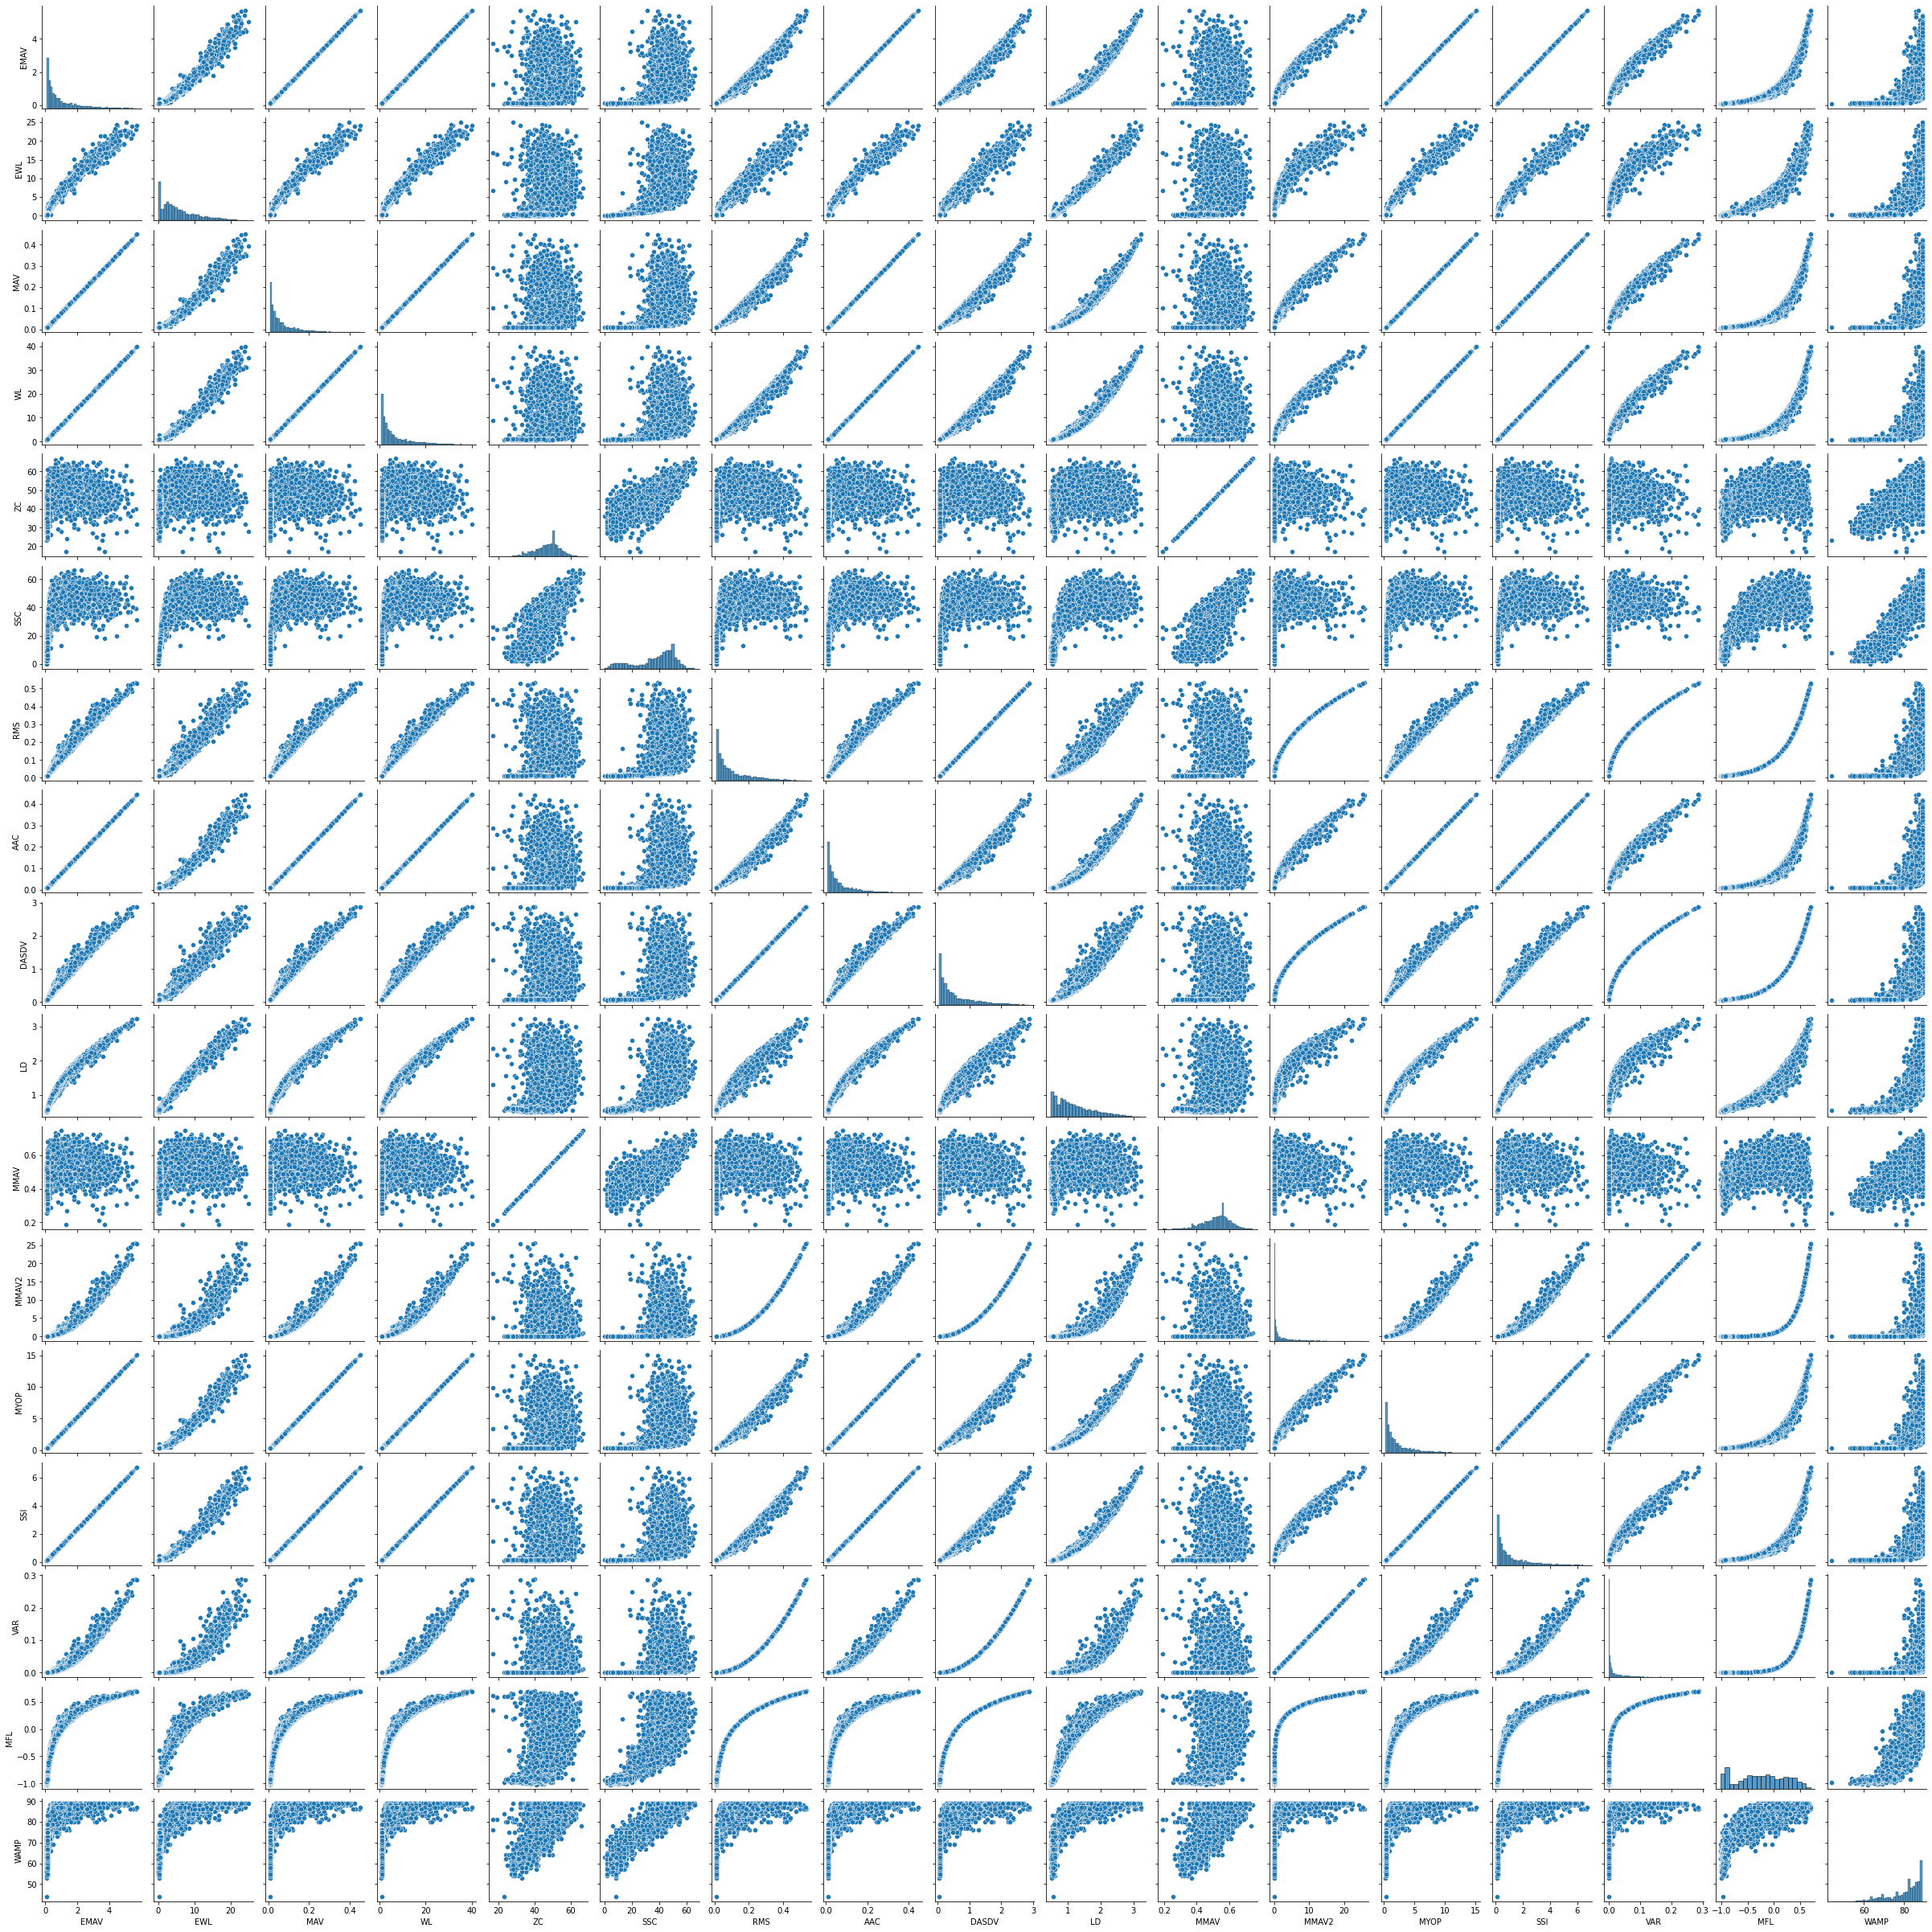

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot(df[cols], size=2.0)

# 3.Seleccion de variable para predecir una clase

# 3 Calcular la matriz de covarianza
\

In [ ]:
cols = ['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','MMAV2','MYOP','SSI','VAR','MFL','WAMP']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,17)].values)

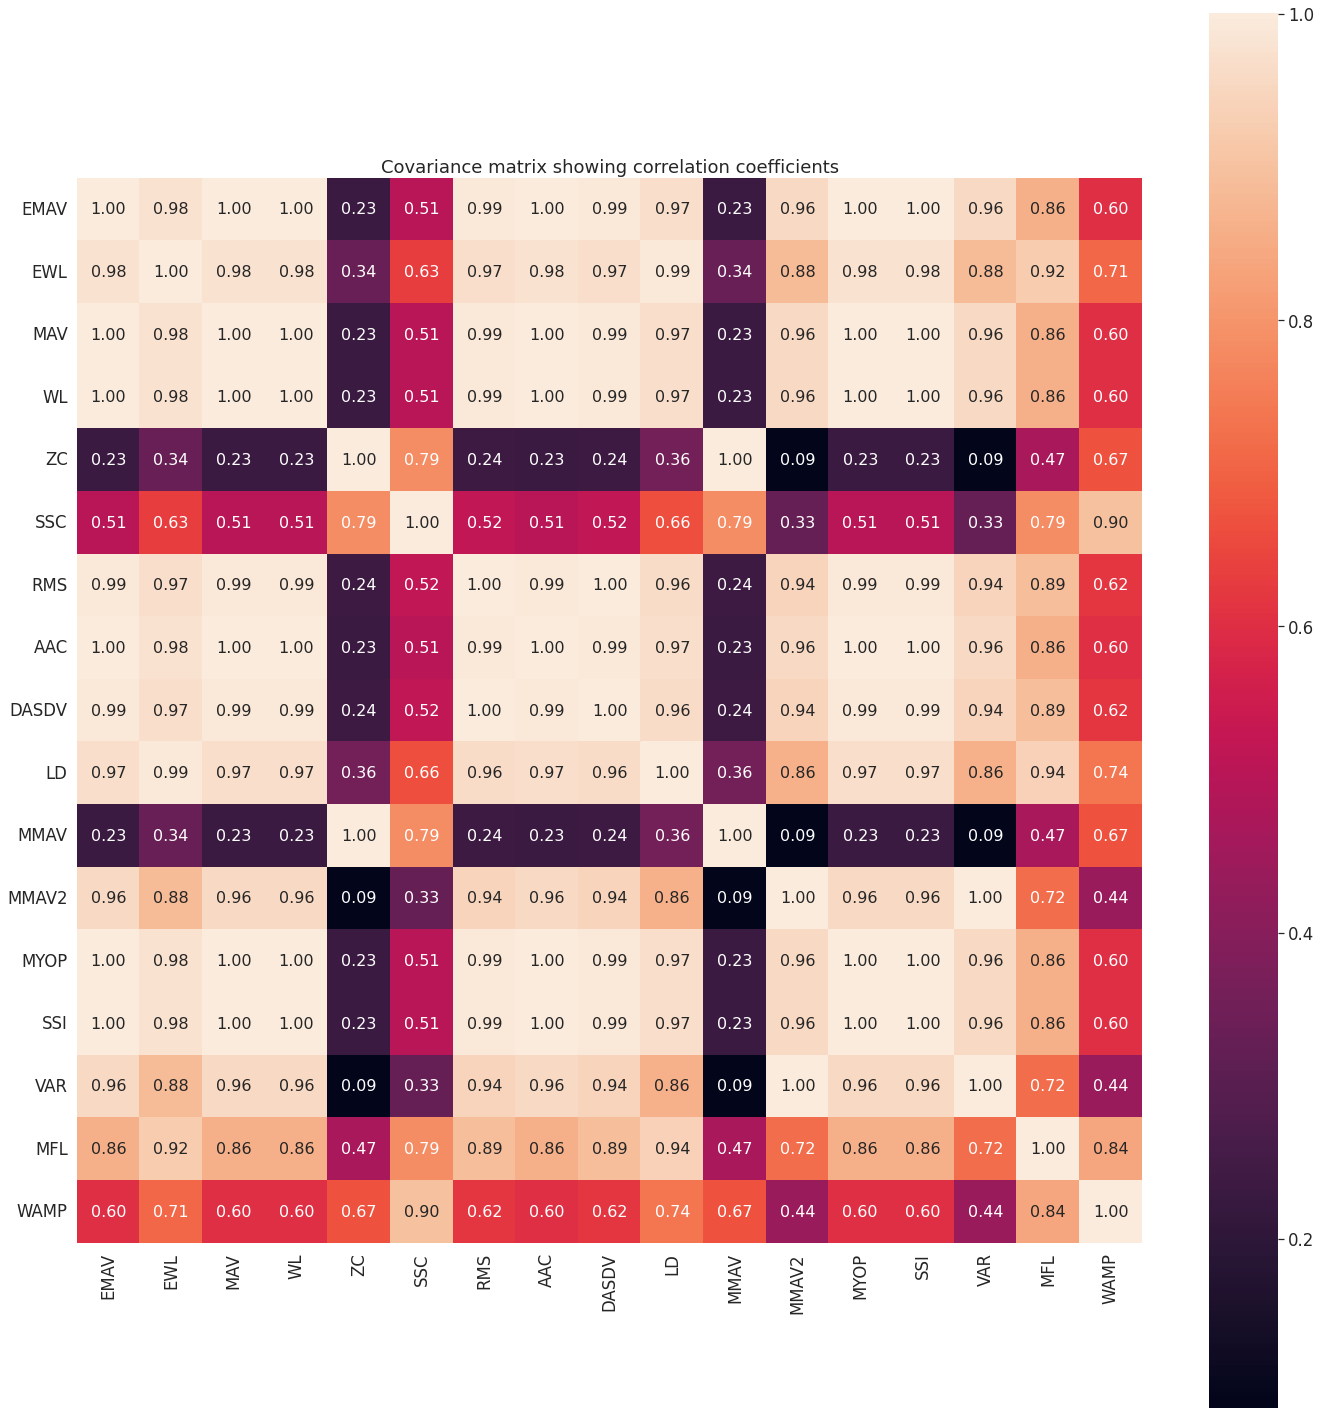

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 16},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

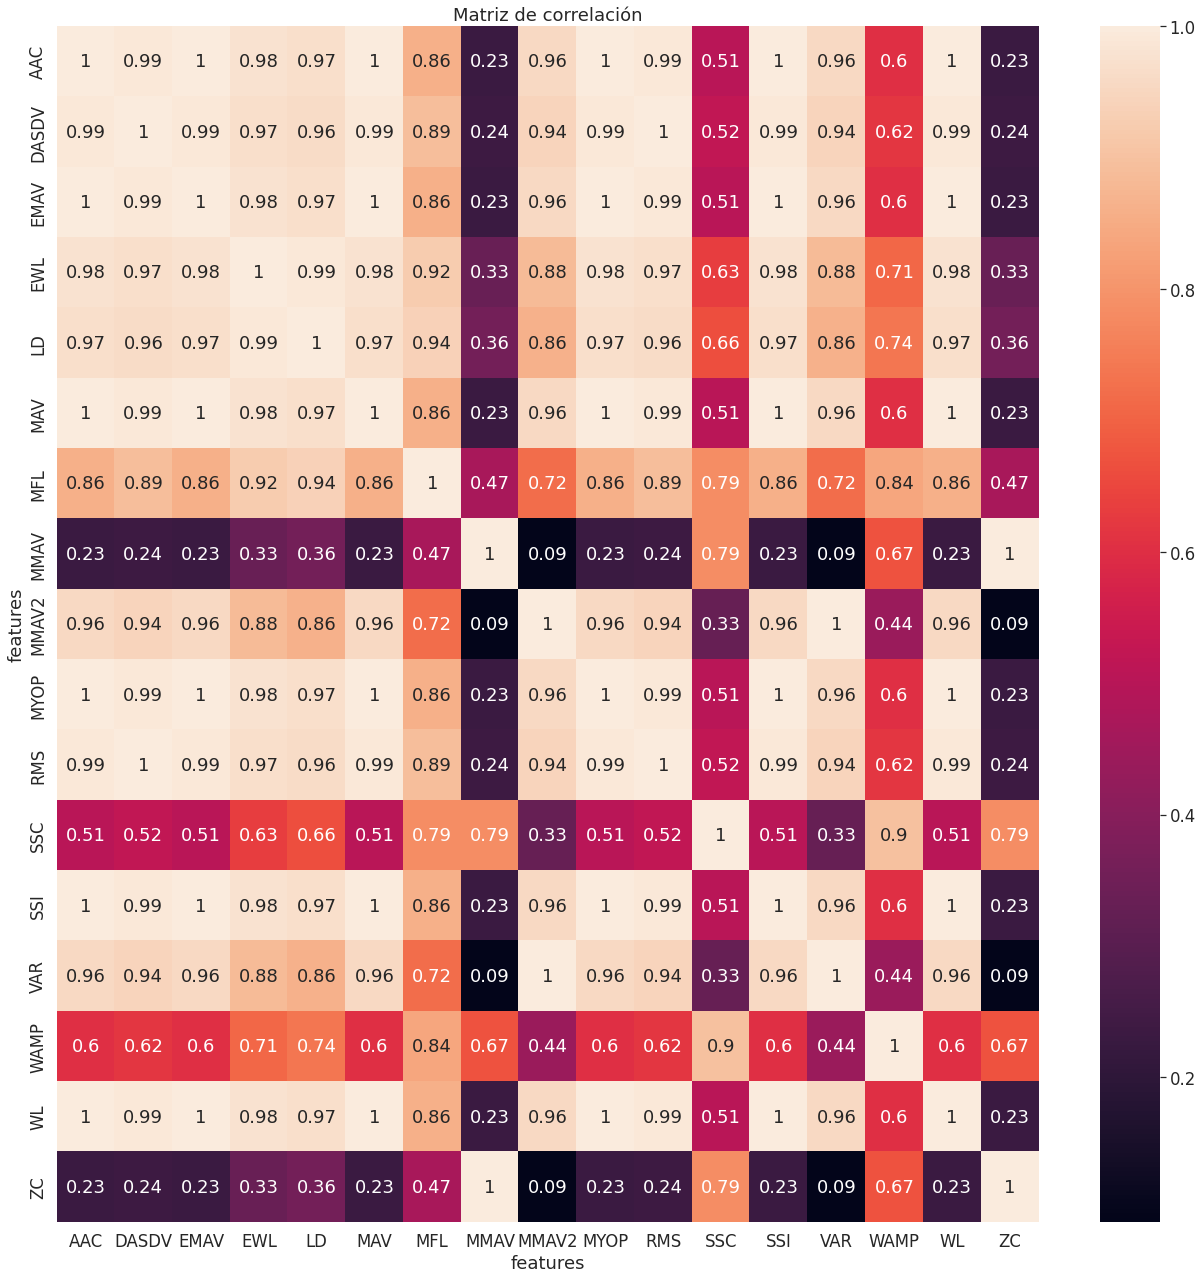

In [ ]:
import seaborn as sns
 
import matplotlib.pyplot as plt
 
correlation_mat = df[df.columns.difference(['CLASE'])].corr()
plt.figure(figsize=(22,22))
 
sns.heatmap(correlation_mat, annot = True)

plt.title("Matriz de correlación")
 
plt.xlabel("features")
 
plt.ylabel("features")
 
plt.show()

In [ ]:
#ordenar matriz de correlación
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

AAC  AAC      1.000000
     DASDV    0.989741
     EMAV     1.000000
     EWL      0.975756
     LD       0.969095
                ...   
ZC   SSI      0.230635
     VAR      0.089731
     WAMP     0.671085
     WL       0.230635
     ZC       1.000000
Length: 289, dtype: float64


In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
 
print(sorted_pairs)


MMAV2  MMAV     0.089731
MMAV   MMAV2    0.089731
       VAR      0.089731
VAR    MMAV     0.089731
       ZC       0.089731
                  ...   
SSI    EMAV     1.000000
       MAV      1.000000
MAV    SSI      1.000000
MYOP   WL       1.000000
WL     MYOP     1.000000
Length: 289, dtype: float64


In [ ]:
#Selección de pares de correlación fuerte (magnitud superior a 0,75)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75]
 
print(strong_pairs)

MMAV  SSC     0.785232
SSC   MMAV    0.785232
      ZC      0.785232
ZC    SSC     0.785232
MFL   SSC     0.785356
                ...   
SSI   EMAV    1.000000
      MAV     1.000000
MAV   SSI     1.000000
MYOP  WL      1.000000
WL    MYOP    1.000000
Length: 181, dtype: float64


In [ ]:
cols_selected = ['AAC', 'MYOP', 'SSI','VAR','MFL']

In [ ]:
df[cols_selected].head()

MMAV2      MYOP       SSI       VAR       MFL
0  0.121582  0.942187  0.421979  0.001366 -0.459992
1  0.263367  1.445269  0.647295  0.002959 -0.292146
2  0.256836  1.483073  0.664226  0.002886 -0.297598
3  0.097534  0.831684  0.372488  0.001096 -0.507848
4  0.014404  0.325694  0.145869  0.000162 -0.923180

In [ ]:
X = df.iloc[:,[2,3,7,12,13]].values    # features matrix 
y = df.iloc[:,[17]].values        # target variable

In [ ]:
X

array([[0.028125  , 2.503125  , 0.0278125 , 0.9421875 , 0.42197917],
       [0.04314236, 3.83967014, 0.042663  , 1.4452691 , 0.6472952 ],
       [0.04427083, 3.94010417, 0.04377894, 1.48307292, 0.66422647],
       ...,
       [0.00920139, 0.81892361, 0.00909915, 0.30824653, 0.13805491],
       [0.01006944, 0.89618056, 0.00995756, 0.33732639, 0.15107896],
       [0.01006944, 0.89618056, 0.00995756, 0.33732639, 0.15107896]])

In [ ]:
y

array([[0],
       [0],
       [0],
       ...,
       [5],
       [5],
       [5]])

In [ ]:
X.shape

(4752, 5)

In [ ]:
y.shape

(4752, 1)

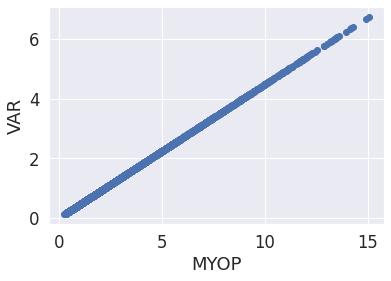

In [ ]:
plt.scatter(df['MYOP'],df['SSI'])
plt.xlabel('MYOP')
plt.ylabel('VAR')
plt.show()

# 5. Modelos

Maquina de Vectores de Soporte

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Sistemas Inteligentes 2022B/Nicolas Alejandro Ruiz Alarcon/NICOLAS_RUIZ_COHORTE_TRES/CARPETA FINAL_NICOLAS_RUIZ_PEDRO_HILE_JUAN_GOMEZ/dataset_cataracteristicas07-seg90.xlsx")

In [ ]:
df.head()

EMAV       EWL       MAV        WL  ZC  SSC       RMS       AAC  \
0  0.357904  2.526811  0.028125  2.503125  46   39  0.036755  0.027812   
1  0.549007  4.774826  0.043142  3.839670  48   49  0.054095  0.042663   
2  0.563367  4.806779  0.044271  3.940104  55   52  0.053420  0.043779   
3  0.315928  2.170790  0.024826  2.209549  48   36  0.032920  0.024551   
4  0.123720  0.321479  0.009722  0.865278  42   12  0.012651  0.009614   

      DASDV        LD      MMAV     MMAV2      MYOP       SSI       VAR  \
0  0.198505  0.922752  0.511111  0.121582  0.942187  0.421979  0.001366   
1  0.292157  1.141310  0.533333  0.263367  1.445269  0.647295  0.002959   
2  0.288512  1.176753  0.611111  0.256836  1.483073  0.664226  0.002886   
3  0.177793  0.860446  0.533333  0.097534  0.831684  0.372488  0.001096   
4  0.068325  0.553812  0.466667  0.014404  0.325694  0.145869  0.000162   

        MFL  WAMP  CLASE  
0 -0.459992    83      0  
1 -0.292146    87      0  
2 -0.297598    87      0  
3 -0.507848    76      0  
4 -0.923180    66      0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X= df[df.columns.difference(['MAV','WL','ZC','SSC','RMS','MMAV','MMAV2','MYOP','SSI','VAR','MFL','WAMP','CLASE'])]
Y=df['CLASE'].values
X_train, X_test, y_train, y_test= train_test_split(X, Y,test_size=0.3,random_state=0, stratify=Y)
X_nom = scaler.transform(X)
scaler = StandardScaler()
X_train_T = scaler.fit_transform(X_train)
X_test_T = scaler.transform(X_test)

In [ ]:
X

AAC     DASDV      EMAV       EWL        LD
0     0.027812  0.198505  0.357904  2.526811  0.922752
1     0.042663  0.292157  0.549007  4.774826  1.141310
2     0.043779  0.288512  0.563367  4.806779  1.176753
3     0.024551  0.177793  0.315928  2.170790  0.860446
4     0.009614  0.068325  0.123720  0.321479  0.553812
...        ...       ...       ...       ...       ...
4747  0.009786  0.067157  0.125929  0.370929  0.548420
4748  0.009013  0.063056  0.115987  0.272030  0.527881
4749  0.009099  0.062266  0.117092  0.148350  0.539651
4750  0.009958  0.066268  0.128138  0.173130  0.571356
4751  0.009958  0.067451  0.128138  0.296809  0.557927

[4752 rows x 5 columns]

In [ ]:
X_train_T

array([[-0.63891007, -0.66747551, -0.63891007, -0.7119971 , -0.66035236],
       [ 0.76551867,  1.14162603,  0.76551867,  0.94616113,  0.75588027],
       [-0.37430755, -0.05961681, -0.37430755, -0.38322828, -0.46399033],
       ...,
       [ 1.68823513,  1.43614625,  1.68823513,  1.84544966,  1.83721936],
       [-0.82096564, -0.88228448, -0.82096564, -1.08934071, -1.09731161],
       [-0.8288811 , -0.89336757, -0.8288811 , -1.0843291 , -1.10917194]])

In [ ]:
X_test_T

array([[ 0.41949999,  0.49411588,  0.41949999,  0.62330649,  0.6313222 ],
       [-0.26462189, -0.28291296, -0.26462189, -0.09076846, -0.01823354],
       [-0.65361021, -0.70825174, -0.65361021, -0.54922858, -0.59863001],
       ...,
       [ 1.4304173 ,  1.71456331,  1.4304173 ,  1.37147242,  1.3167339 ],
       [-0.65361021, -0.61600528, -0.65361021, -0.72940479, -0.77416789],
       [ 0.95435892,  1.18498621,  0.95435892,  1.52181555,  1.02306963]])

## hiperparametro rbf

In [ ]:
#maquinas de vector de soporte
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
# Maquinas de vector de soporte
param_grid = {'kernel': ['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [0.1, 0.001, 1, 2, 3, 4, 10, 100]}
svck = SVC()
grid = GridSearchCV(svck, param_grid, refit = True, verbose = 2)
grid.fit(X_train_T, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.001, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.001, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.001, 1, 2, 3, 4, 10, 100],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
# imprimir el mejor parametro despues del ajuste
print(grid.best_params_)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
#create a new KNN model
svc_cv = SVC(kernel = 'rbf',C=1000, gamma =10)
#train model with cv of 5 
score_pred = cross_val_score(svc_cv.fit(X_train_T,y_train), X_nom, Y, cv=5)
score_mean_pred = np.mean(score_pred)
#print each cv score (accuracy) and average them
print(score_pred)
print('cv_scores mean:{}'.format(score_mean_pred))

[0.42376446 0.44900105 0.38947368 0.34526316 0.39157895]
cv_scores mean:0.39981625989263375


In [ ]:
grid_predictions = svc_cv.predict(X_test_T)
print(grid_predictions)

[2 3 3 ... 4 3 1]


In [ ]:
svc = SVC(kernel = 'rbf', C=100, gamma=0.1, random_state = 123)
svc.fit(X_train_T, y_train)
score=svc.score(X_train_T,y_train)
print("metricas del modelo: ",score)

metricas del modelo:  0.5204449789536981


In [ ]:
grid_predictions2 = svc.predict(X_test_T)
print(grid_predictions2)

[1 3 0 ... 4 3 4]


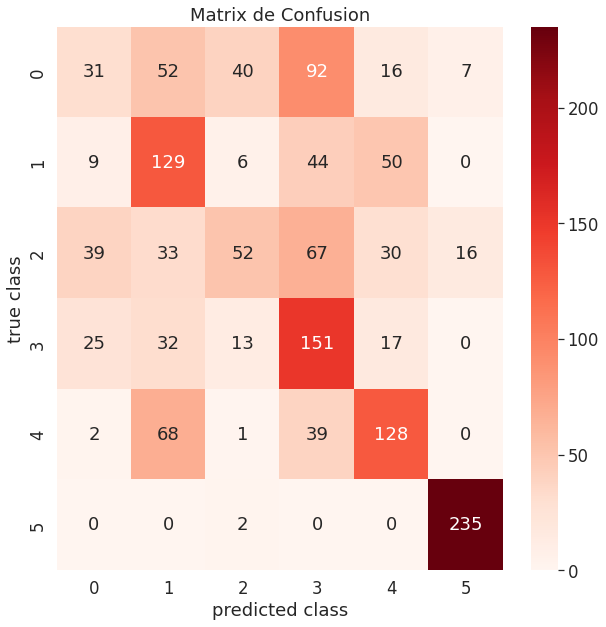

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cmd = confusion_matrix(y_test, grid_predictions2)


plt.figure(figsize=(10,10))
sns.heatmap(cmd, annot=True, fmt="d",cmap="Reds");
plt.title("Matrix de Confusion")
plt. ylabel("true class")
plt.xlabel("predicted class")
plt.show()

In [ ]:
exactitud=metrics.accuracy_score(grid_predictions2,y_test)
print("exactitud del modelo ", exactitud)

exactitud del modelo  0.47619047619047616


In [ ]:
print('Precisión (Accuracy) del clasificador en el conjunto : {:.2f}'.format(svc.score(X_test_T, y_test )))

Precisión (Accuracy) del clasificador en el conjunto : 0.48


In [ ]:
from sklearn.metrics import classification_report
#Tasa de falsos positivos
print(classification_report(y_test,grid_predictions2))

              precision    recall  f1-score   support

           0       0.23      0.37      0.28        84
           1       0.57      0.39      0.46        84
           2       0.32      0.20      0.25        84
           3       0.37      0.26      0.31        84
           4       0.47      0.63      0.54        84
           5       1.00      1.00      1.00        84

    accuracy                           0.48       504
   macro avg       0.49      0.48      0.47       504
weighted avg       0.49      0.48      0.47       504



In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,grid_predictions2)
print("Error medio cuadratico ", mse)

Error medio cuadratico  3.234126984126984


## hiperparametros lineal

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X= df[df.columns.difference(['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','CLASE'])]
Y=df['CLASE']
X_nom = preprocessing.normalize(X)
X_train, X_test, y_train, y_test= train_test_split(X_nom, Y,test_size=0.3,random_state=0, stratify=Y)
scaler = StandardScaler()
X_train_T = scaler.fit_transform(X_train)
X_test_T = scaler.fit_transform(X_test)

In [ ]:
#maquinas de vector de soporte
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
# Maquinas de vector de soporte
param_grid = {'kernel': ['linear'], 'C':[0.001, 0.01, 0.1, 1, 5, 10, 50,100]}
svck = SVC()
grid1 = GridSearchCV(svck, param_grid, refit = True, verbose = 2)
grid1.fit(X_train_T, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END .............................C=0.001, kernel=linear; total time=   0.1s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 50, 100],
                         'kernel': ['linear']},
             verbose=2)

In [ ]:
# imprimir el mejor parametro despues del ajuste
print(grid1.best_params_)


{'C': 100, 'kernel': 'linear'}


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
svc_cv = SVC(kernel = 'linear',C= 100, random_state = 0)
#train model with cv of 5 
score_pred2 = cross_val_score(svc_cv.fit(X_train_T,y_train), X_nom, Y, cv=5)
score_mean_pred2 = np.mean(score_pred2)
#print each cv score (accuracy) and average them
print(score_pred2)
print('cv_scores mean:{}'.format(score_mean_pred2))

[0.41369048 0.40178571 0.30952381 0.36607143 0.51785714]
cv_scores mean:0.4017857142857143


In [ ]:
grid_predictions = svc_cv.predict(X_test_T)
print(grid_predictions)

[1 5 3 5 1 5 1 3 2 3 3 1 2 3 1 3 2 1 3 2 1 3 1 3 2 3 5 4 2 1 5 1 5 1 5 4 5
 3 3 5 3 3 3 4 3 4 1 3 2 4 1 4 5 4 1 3 2 3 5 3 4 3 3 4 3 4 4 2 2 3 2 3 3 3
 1 3 1 3 4 5 4 3 4 2 1 3 4 5 5 2 1 3 1 5 3 1 1 3 3 1 5 1 1 3 2 3 1 3 1 5 5
 3 4 1 1 5 2 3 3 3 2 1 3 5 2 2 3 3 1 3 5 4 3 5 3 2 3 3 2 1 1 3 3 5 1 4 1 4
 3 3 4 3 3 5 4 1 1 1 1 3 2 5 4 3 3 5 2 3 2 5 1 3 3 3 3 5 1 3 1 5 3 1 3 5 4
 1 3 1 5 4 3 1 5 1 3 4 1 1 5 4 5 5 1 3 5 5 5 1 1 5 4 3 3 3 4 4 2 3 1 1 1 1
 2 1 1 1 3 1 5 1 3 4 3 3 3 3 5 1 1 5 3 3 4 1 2 1 3 1 2 1 1 5 5 5 1 5 3 4 2
 1 1 5 4 1 1 2 3 1 1 4 1 2 3 5 2 1 1 1 3 3 3 5 2 1 1 3 2 2 5 1 4 3 5 3 2 1
 1 3 3 5 2 3 3 1 4 5 4 4 5 3 4 1 3 3 1 3 3 5 1 5 5 1 3 3 1 1 4 1 4 4 3 3 4
 5 1 3 5 3 4 1 2 1 3 3 1 2 2 5 3 2 2 5 3 4 3 3 3 3 3 3 2 5 1 4 5 2 2 1 4 3
 4 2 3 2 1 1 5 5 3 5 2 4 4 3 5 2 2 2 3 3 2 3 3 2 1 1 1 3 4 4 3 1 5 4 1 4 4
 2 2 1 3 5 3 1 4 1 1 3 5 3 4 1 3 3 4 3 2 3 3 1 2 3 4 2 1 5 1 2 3 1 2 3 3 5
 3 3 3 4 5 3 1 3 5 3 3 5 4 3 1 3 3 3 4 3 2 4 4 4 2 3 2 5 1 2 1 4 5 3 4 4 4
 4 1 1 5 3 1 3 5 5 1 3 3 

In [ ]:
svc = SVC(kernel = 'linear', C=100, random_state = 0)
svc.fit(X_train_T, y_train)
score=svc.score(X_train_T,y_train)
print("metricas del modelo: ",score)

metricas del modelo:  0.5272108843537415


In [ ]:
grid_predictions2 = svc.predict(X_test_T)
print(grid_predictions2)

[1 5 3 5 1 5 1 3 2 3 3 1 2 3 1 3 2 1 3 2 1 3 1 3 2 3 5 4 2 1 5 1 5 1 5 4 5
 3 3 5 3 3 3 4 3 4 1 3 2 4 1 4 5 4 1 3 2 3 5 3 4 3 3 4 3 4 4 2 2 3 2 3 3 3
 1 3 1 3 4 5 4 3 4 2 1 3 4 5 5 2 1 3 1 5 3 1 1 3 3 1 5 1 1 3 2 3 1 3 1 5 5
 3 4 1 1 5 2 3 3 3 2 1 3 5 2 2 3 3 1 3 5 4 3 5 3 2 3 3 2 1 1 3 3 5 1 4 1 4
 3 3 4 3 3 5 4 1 1 1 1 3 2 5 4 3 3 5 2 3 2 5 1 3 3 3 3 5 1 3 1 5 3 1 3 5 4
 1 3 1 5 4 3 1 5 1 3 4 1 1 5 4 5 5 1 3 5 5 5 1 1 5 4 3 3 3 4 4 2 3 1 1 1 1
 2 1 1 1 3 1 5 1 3 4 3 3 3 3 5 1 1 5 3 3 4 1 2 1 3 1 2 1 1 5 5 5 1 5 3 4 2
 1 1 5 4 1 1 2 3 1 1 4 1 2 3 5 2 1 1 1 3 3 3 5 2 1 1 3 2 2 5 1 4 3 5 3 2 1
 1 3 3 5 2 3 3 1 4 5 4 4 5 3 4 1 3 3 1 3 3 5 1 5 5 1 3 3 1 1 4 1 4 4 3 3 4
 5 1 3 5 3 4 1 2 1 3 3 1 2 2 5 3 2 2 5 3 4 3 3 3 3 3 3 2 5 1 4 5 2 2 1 4 3
 4 2 3 2 1 1 5 5 3 5 2 4 4 3 5 2 2 2 3 3 2 3 3 2 1 1 1 3 4 4 3 1 5 4 1 4 4
 2 2 1 3 5 3 1 4 1 1 3 5 3 4 1 3 3 4 3 2 3 3 1 2 3 4 2 1 5 1 2 3 1 2 3 3 5
 3 3 3 4 5 3 1 3 5 3 3 5 4 3 1 3 3 3 4 3 2 4 4 4 2 3 2 5 1 2 1 4 5 3 4 4 4
 4 1 1 5 3 1 3 5 5 1 3 3 

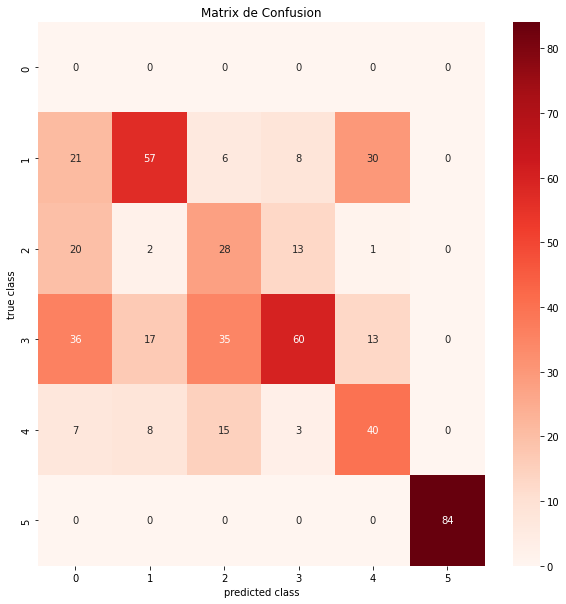

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cmd = confusion_matrix(grid_predictions2, y_test)


plt.figure(figsize=(10,10))
sns.heatmap(cmd, annot=True, fmt="d",cmap="Reds");
plt.title("Matrix de Confusion")
plt. ylabel("true class")
plt.xlabel("predicted class")
plt.show()

In [ ]:
exactitud=metrics.accuracy_score(grid_predictions2,y_test)
print("exactitud del modelo ", exactitud)

exactitud del modelo  0.5337301587301587


In [ ]:
print('Precisión (Accuracy) del clasificador en el conjunto : {:.2f}'.format(svc.score(X_test_T, y_test )))

Precisión (Accuracy) del clasificador en el conjunto : 0.53


In [ ]:
from sklearn.metrics import classification_report
#Tasa de falsos positivos
print(classification_report(y_test,grid_predictions2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.47      0.68      0.55        84
           2       0.44      0.33      0.38        84
           3       0.37      0.71      0.49        84
           4       0.55      0.48      0.51        84
           5       1.00      1.00      1.00        84

    accuracy                           0.53       504
   macro avg       0.47      0.53      0.49       504
weighted avg       0.47      0.53      0.49       504



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,grid_predictions2)
print("Error medio cuadratico ", mse)

Error medio cuadratico  2.2123015873015874


## hiperparametro sigmoid

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X= df[df.columns.difference(['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','CLASE'])]
Y=df['CLASE'].values
X_nom = preprocessing.normalize(X)
X_train, X_test, y_train, y_test= train_test_split(X_nom, Y,test_size=0.3,random_state=0, stratify=Y)
scaler = StandardScaler()
X_train_T = scaler.fit_transform(X_train)
X_test_T = scaler.transform(X_test)

In [ ]:
#maquinas de vector de soporte
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
# Maquinas de vector de soporte
param_grid = {'kernel':['sigmoid'],'C':[0.1,1,10,100],
              'gamma':[0.1,1,10],
              'degree':[2,3,4,5], 'coef0':[0.1,0.5,1,2,]}
svck = SVC()
grid2 = GridSearchCV(svck, param_grid, refit = True, verbose = 2)
grid2.fit(X_train_T, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END C=0.1, coef0=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2, gamma=10, kernel=sigmoid; total time=   0.1s
[CV] END C=0.1, coef0=0.1, degree=2

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.1, 0.5, 1, 2],
                         'degree': [2, 3, 4, 5], 'gamma': [0.1, 1, 10],
                         'kernel': ['sigmoid']},
             verbose=2)

In [ ]:
# imprimir el mejor parametro despues del ajuste
print(grid2.best_params_)

{'C': 10, 'coef0': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
svc_cv = SVC(kernel = 'sigmoid',C=10, coef0= 0.1, degree = 2, gamma= 0.1, random_state = 0)
#train model with cv of 5 
score_pred = cross_val_score(svc_cv.fit(X_train_T,y_train), X_nom, Y, cv=5)
score_mean_pred = np.mean(score_pred)
#print each cv score (accuracy) and average them
print(score_pred)
print('cv_scores mean:{}'.format(score_mean_pred))

[0.22916667 0.29166667 0.19047619 0.3452381  0.38392857]
cv_scores mean:0.28809523809523807


In [ ]:
grid_predictions3 = svc_cv.predict(X_test_T)
print(grid_predictions3)

[1 5 3 5 0 5 4 3 2 1 3 0 2 3 4 1 2 0 3 2 1 3 0 3 1 3 5 0 1 0 5 4 5 1 5 1 5
 3 3 5 3 3 3 0 3 1 2 3 3 1 1 4 5 4 4 1 3 3 5 3 1 3 3 4 1 0 4 0 2 3 2 3 3 3
 4 3 0 3 4 5 4 3 0 2 4 3 1 5 5 3 4 3 0 5 3 0 4 3 3 4 5 4 0 1 2 1 4 3 2 5 5
 3 0 1 2 5 3 3 3 3 3 0 3 5 1 2 3 1 1 3 5 0 3 5 3 0 1 3 2 1 0 3 3 5 4 3 4 0
 3 3 1 3 3 5 4 0 1 0 1 3 2 5 1 3 3 5 3 3 2 5 4 3 3 3 3 5 0 1 2 5 3 0 3 5 4
 1 3 0 5 4 3 4 5 1 1 1 0 1 5 4 5 5 1 3 5 5 5 0 4 5 0 1 1 3 0 1 2 3 1 1 1 4
 3 0 1 4 3 2 5 4 1 4 3 3 3 3 5 0 0 5 3 1 3 1 2 1 3 4 2 1 1 5 5 5 1 5 3 0 2
 1 1 5 3 0 1 2 3 1 4 1 4 3 3 5 1 1 1 1 3 3 1 5 2 4 0 3 3 1 5 4 4 3 5 3 3 1
 2 3 1 5 2 1 3 0 1 5 0 4 5 1 1 1 3 3 1 3 3 5 1 5 5 4 3 3 0 0 1 0 3 4 3 3 0
 5 1 1 5 3 4 4 2 1 3 1 1 2 3 5 3 1 3 5 3 2 3 3 3 3 1 1 2 5 1 1 5 4 2 4 4 3
 4 3 1 2 0 4 5 5 1 5 2 0 4 3 5 2 2 3 3 1 2 3 3 3 0 1 0 3 0 0 3 1 5 4 1 0 3
 2 2 1 3 5 1 0 1 2 0 1 5 3 1 1 3 1 1 3 2 3 1 4 2 1 1 3 0 5 4 3 3 1 1 3 3 5
 3 3 3 0 5 3 0 3 5 1 1 5 0 3 1 1 3 3 4 3 2 4 1 2 3 3 2 5 1 2 4 1 5 3 4 0 4
 0 0 4 5 3 0 1 5 5 0 3 3 

In [ ]:
svc = SVC(kernel = 'sigmoid', C=1, coef0= 0.1, degree = 2, gamma= 0.1, random_state = 0)
svc.fit(X_train_T, y_train)
score=svc.score(X_train_T,y_train)
print("metricas del modelo: ",score)

metricas del modelo:  0.4421768707482993


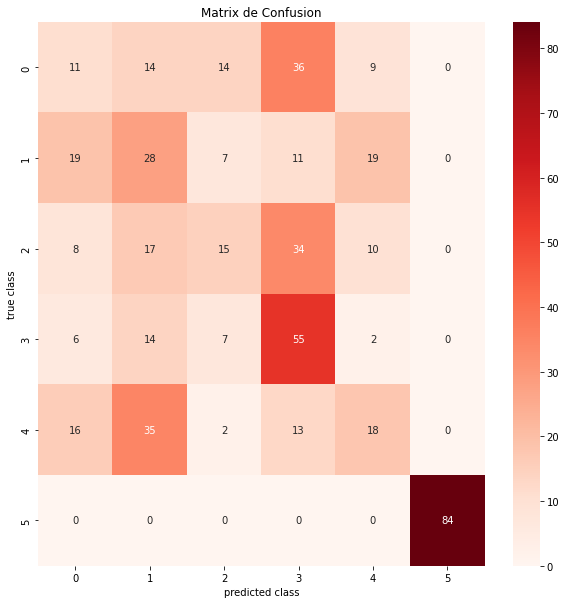

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cmd = confusion_matrix(y_test, grid_predictions3)


plt.figure(figsize=(10,10))
sns.heatmap(cmd, annot=True, fmt="d",cmap="Reds");
plt.title("Matrix de Confusion")
plt. ylabel("true class")
plt.xlabel("predicted class")
plt.show()

In [ ]:
exactitud=metrics.accuracy_score(grid_predictions3,y_test)
print("exactitud del modelo ", exactitud)

exactitud del modelo  0.3948412698412698


In [ ]:
print('Precisión (Accuracy) del clasificador en el conjunto : {:.2f}'.format(svc.score(X_test_T, y_test )))

Precisión (Accuracy) del clasificador en el conjunto : 0.39


In [ ]:
from sklearn.metrics import classification_report
#Tasa de falsos positivos
print(classification_report(y_test,grid_predictions3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.25      0.33      0.29        84
           2       0.20      0.39      0.27        84
           3       0.38      0.52      0.44        84
           4       0.32      0.12      0.17        84
           5       1.00      1.00      1.00        84

    accuracy                           0.39       504
   macro avg       0.36      0.39      0.36       504
weighted avg       0.36      0.39      0.36       504



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,grid_predictions3)
print("Error medio cuadratico ", mse)

Error medio cuadratico  3.206122448979592


USANDO TUNNING COMPLETO SVM

In [ ]:

# Data processing
import pandas as pd
import numpy as np
# Standardize the data
from sklearn.preprocessing import StandardScaler
# Modeling 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [ ]:
# Check the target value distribution
df['CLASE']

0       0
1       0
2       0
3       0
4       0
       ..
1627    5
1628    5
1629    5
1630    5
1631    5
Name: CLASE, Length: 1632, dtype: int64

In [ ]:
# Train test split
X= df[df.columns.difference(['EMAV','EWL','MAV','WL','ZC','SSC','RMS','AAC','DASDV','LD','MMAV','CLASE'])]
Y=df['CLASE'].values
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
# Check the number of records in training and testing dataset.
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 1176 records.
The testing dataset has 504 records.


Estandarización

In [ ]:
# Initiate scaler
sc = StandardScaler()
# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
# Standardized the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
# Summary statistics after standardization
X_train_transformed.describe().T

count          mean       std       min       25%       50%       75%  \
MFL    1176.0 -9.063045e-18  1.000425 -1.744391 -0.683585  0.056646  0.870580   
MMAV2  1176.0 -5.890979e-17  1.000425 -0.613613 -0.585004 -0.468913  0.177506   
MYOP   1176.0  1.359457e-17  1.000425 -0.928249 -0.723246 -0.381036  0.501815   
SSI    1176.0  1.374562e-16  1.000425 -0.928249 -0.723246 -0.381036  0.501815   
VAR    1176.0 -6.193081e-17  1.000425 -0.613613 -0.585004 -0.468913  0.177506   
WAMP   1176.0 -3.927320e-16  1.000425 -3.155055 -0.343413  0.321157  0.730123   

            max  
MFL    1.817909  
MMAV2  4.989910  
MYOP   4.210434  
SSI    4.210434  
VAR    4.989910  
WAMP   1.190209

In [ ]:
# Summary statistics before standardization
X_train.describe().T

count        mean        std         min         25%         50%  \
MFL    1176.0    0.018241   0.448039   -0.762982   -0.287902    0.043610   
MMAV2  1176.0    5.107658   8.278692    0.029907    0.266647    1.227325   
MYOP   1176.0    6.687253   6.338079    0.806438    2.105211    4.273242   
SSI    1176.0    2.980154   2.824546    0.359386    0.938181    1.904358   
VAR    1176.0    0.020513   0.033248    0.000120    0.001071    0.004929   
WAMP   1176.0  225.717687  19.569848  164.000000  219.000000  232.000000   

              75%         max  
MFL      0.408129    0.832389  
MMAV2    6.576553   46.400024  
MYOP     9.866441   33.361969  
SSI      4.396951   14.867663  
VAR      0.026412    0.186345  
WAMP   240.000000  249.000000

In [ ]:
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

0
C                          1.0
break_ties               False
cache_size                 200
class_weight              None
coef0                      0.0
decision_function_shape    ovr
degree                       3
gamma                    scale
kernel                     rbf
max_iter                    -1
probability              False
random_state              None
shrinking                 True
tol                      0.001
verbose                  False

In [ ]:
# Run model
svc.fit(X_train_transformed, y_train)
# Accuracy score
print(f'The accuracy score of the model is {svc.score(X_test_transformed, y_test):.4f}')


The accuracy score of the model is 0.5278


Tunning

In [ ]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


In [ ]:
# Define the search space
param_grid = { 
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_transformed, y_train)
# Print grid search summary
grid_result

In [ ]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test_transformed, y_test):.4f}')

The best accuracy score for the training dataset is 0.5044
The best hyperparameters are {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}
The accuracy score for the testing dataset is 0.5163
